# Use the telegraph model to generate some time series data for us so we can use it to train neural networks
The telegraph model (TM) looks like the below, with 4 reactions:

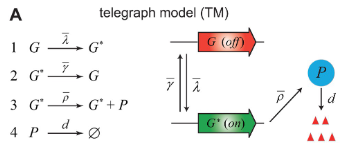

My objective is to adapt this to produce some time series data for the different transcription factors (TFs) under different stresses. 

Let's start with the SSA model built for a previous practice

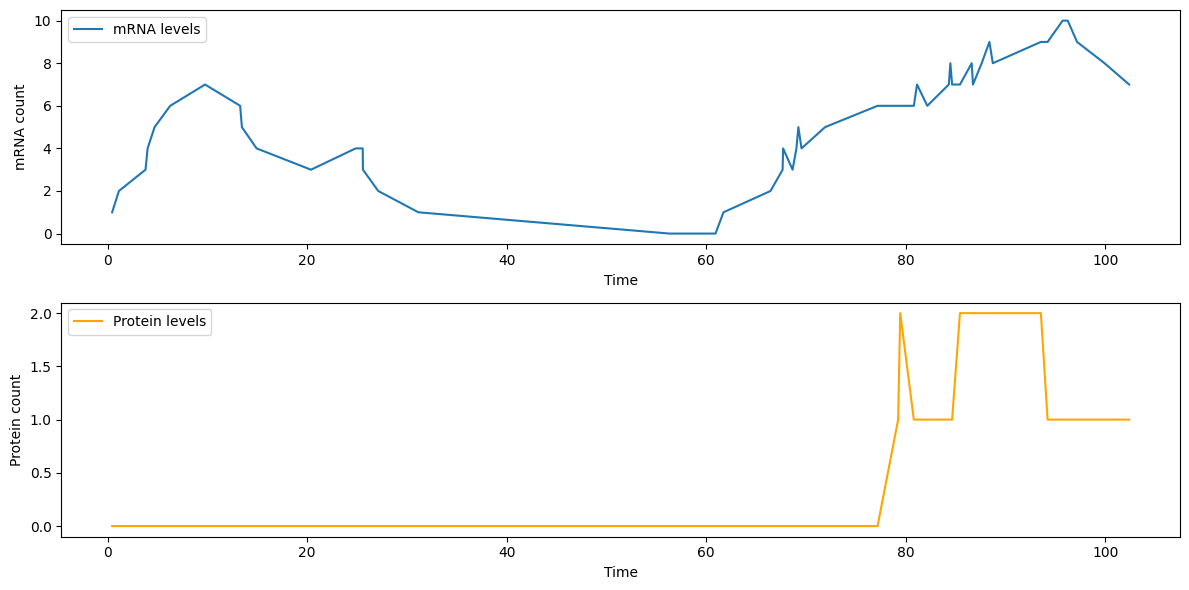

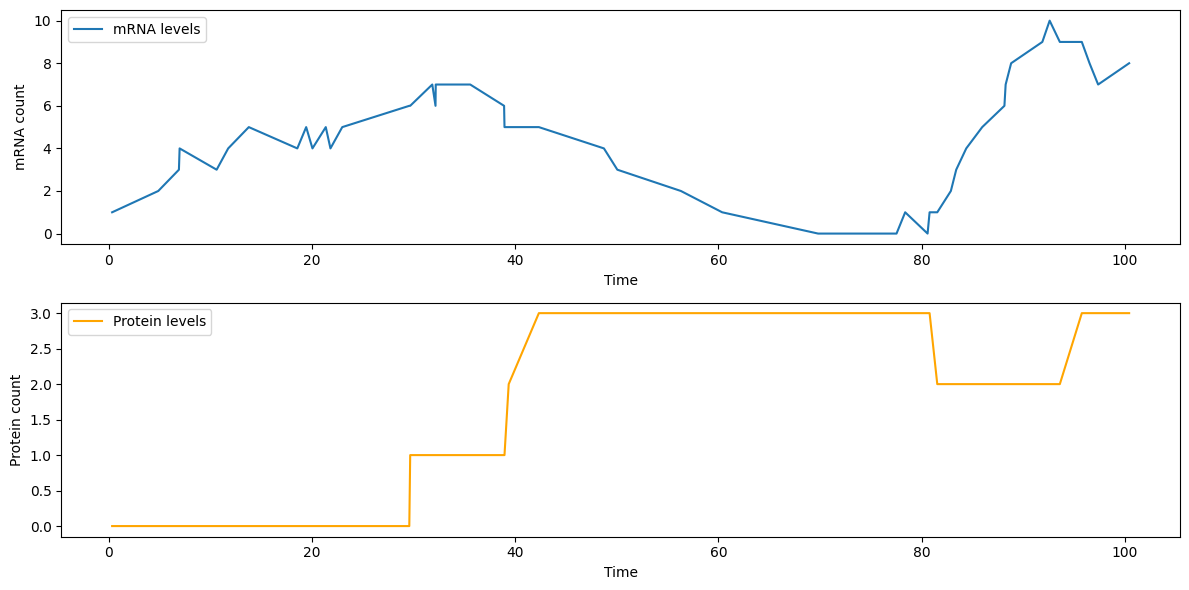

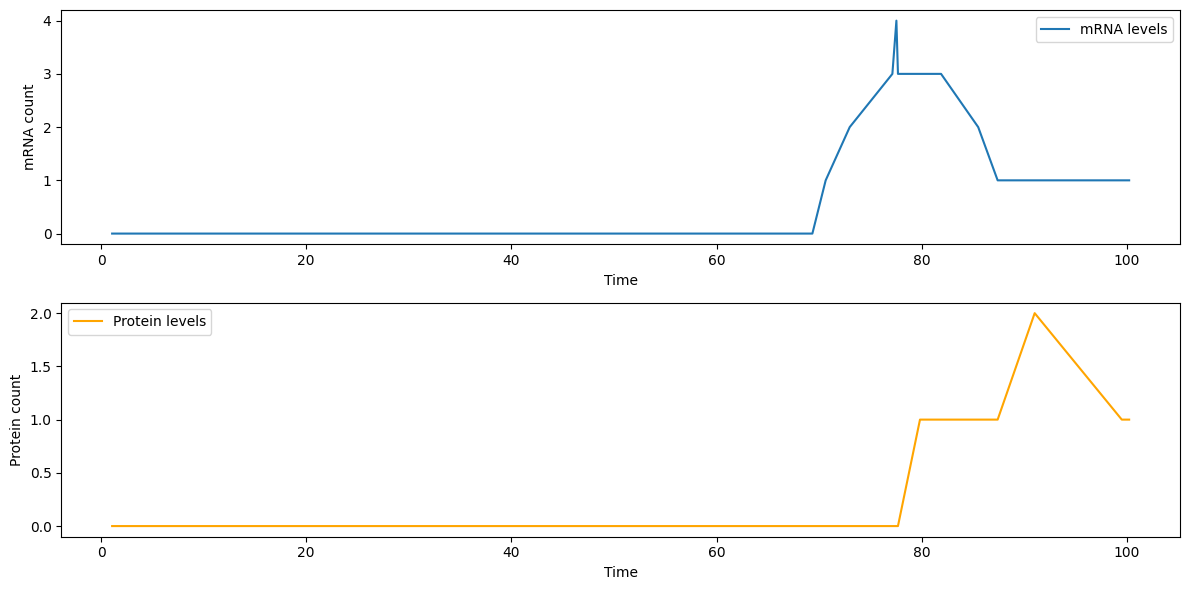

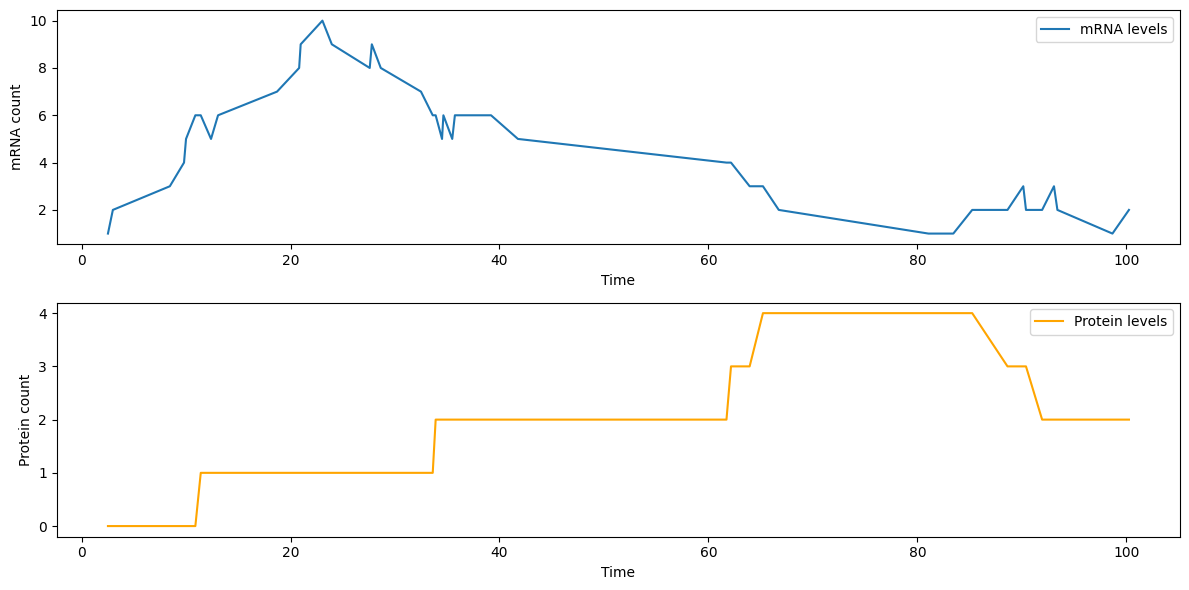

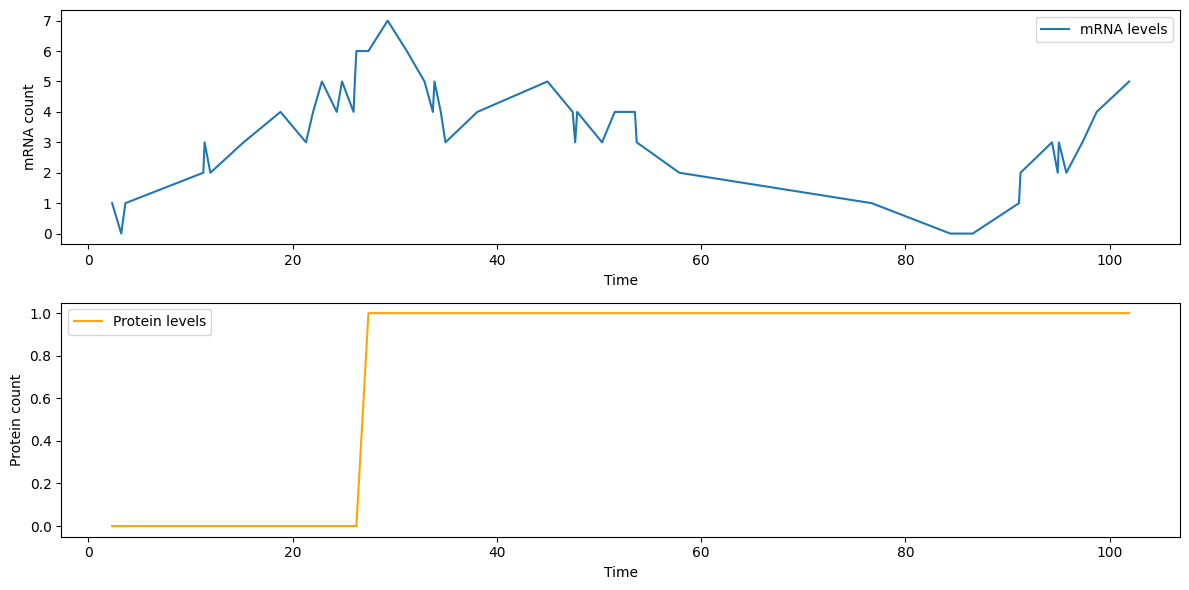

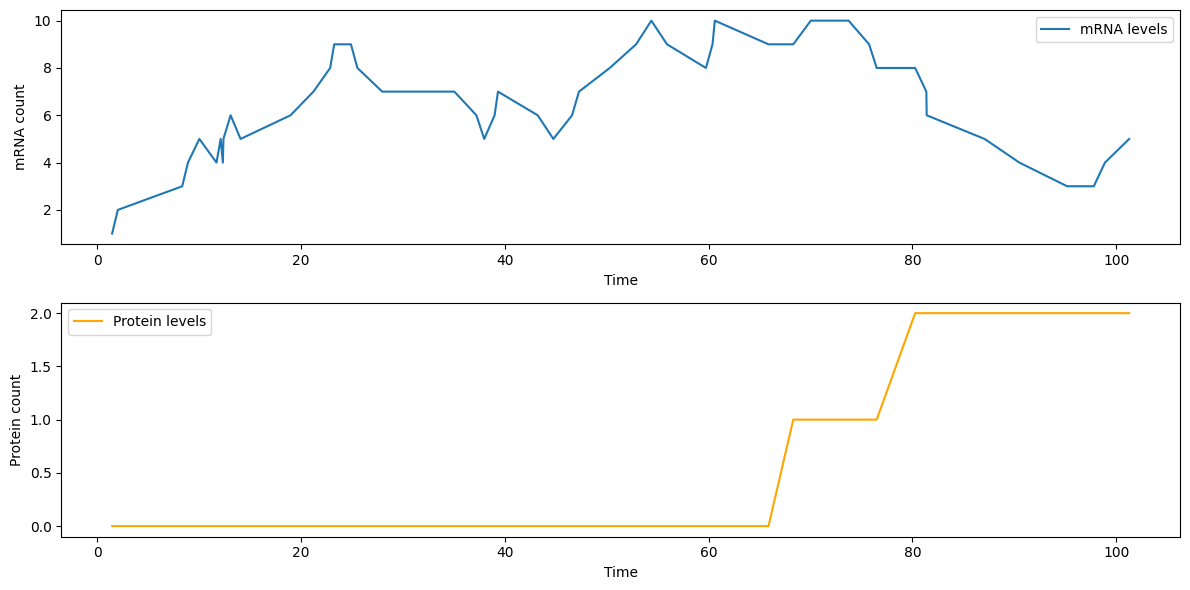

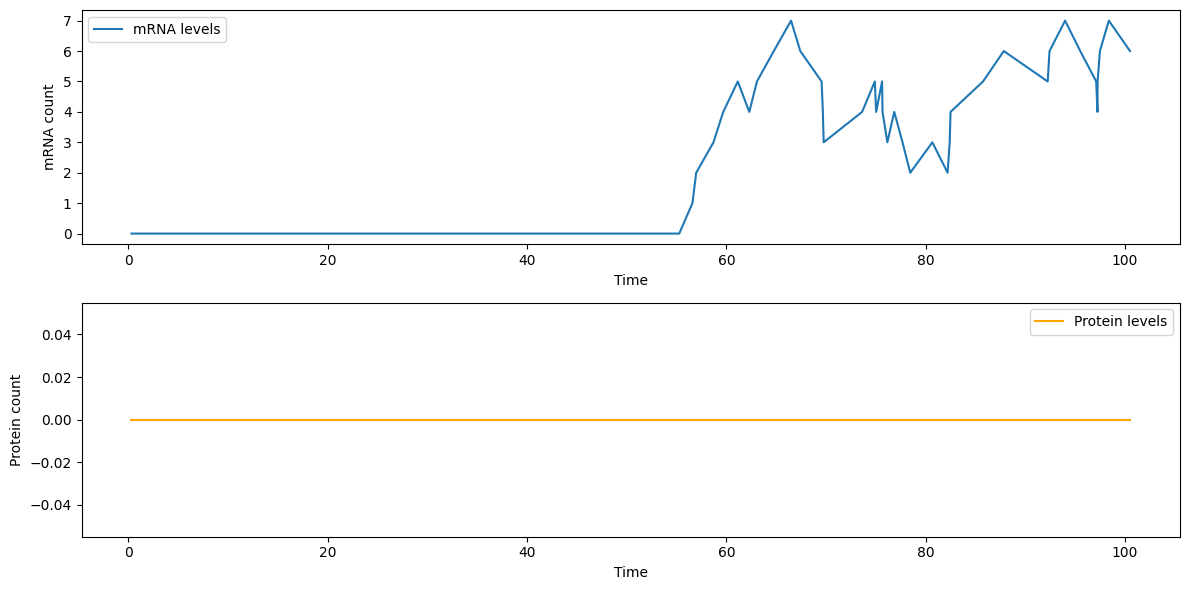

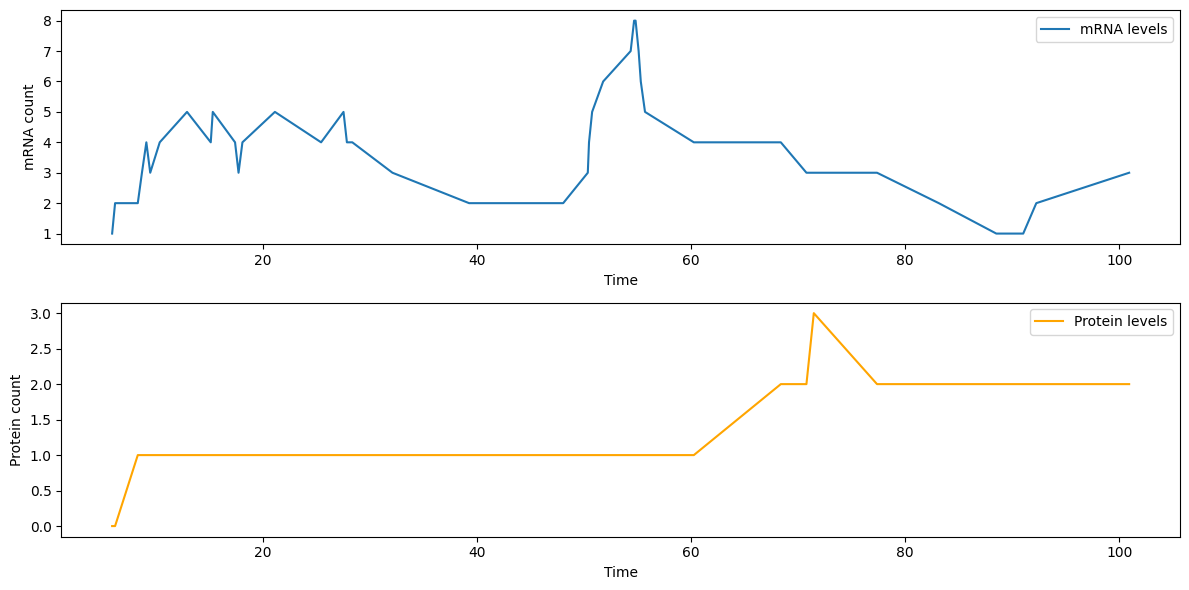

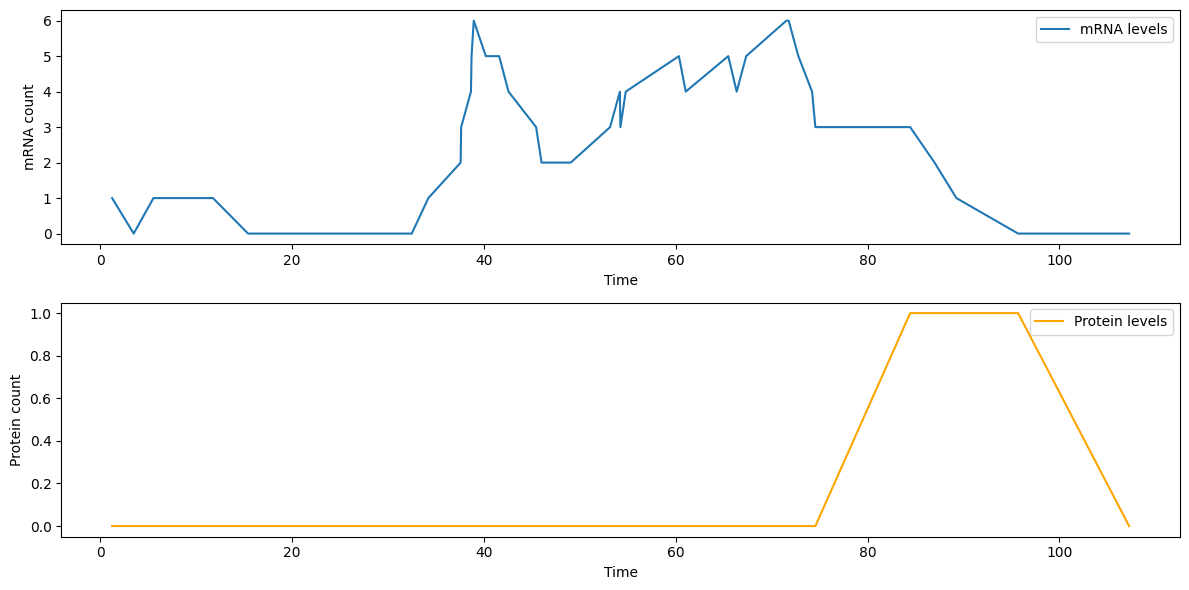

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rates for each reaction (constants)
alpha_on = 0.1     # Rate of G -> G*
alpha_off = 1     # Rate of G* -> G
beta = 10          # Rate of G -> G + M (mRNA production)
gamma_m = 0.05      # Rate of M -> 0 (mRNA degradation)
gamma_p = 0.01      # Rate of M -> M + P (protein production)
protein_degradation = 0.01  # Rate of P -> 0 (protein degradation)

# Simulation time and number of cells
T = 100             # Simulation time
num_cells = 1000    # Number of cells to simulate

def gillespie_algorithm():
    # 1. Initialisation: Initial states - G is active, M = 0, P = 0
    G_active = 1    # G is initially active
    M = 0           # Initial mRNA count
    P = 0           # Initial protein count
    t = 0           # Initialize time

    # Time until we stop the simulation
    t_max = T

    # Lists to store mRNA and protein levels
    mRNA_levels = []
    protein_levels = []
    times = []

    # Run the simulation until t exceeds t_max
    while t < t_max:
        # 2. Calculate reaction propensities (reaction rates)
        a1 = alpha_on * G_active         # Propensity for G -> G*
        a2 = alpha_off * (1 - G_active)  # Propensity for G* -> G
        a3 = beta * G_active             # Propensity for G -> G + M (mRNA production)
        a4 = gamma_m * M                 # Propensity for M -> 0 (mRNA degradation)
        a5 = gamma_p * M                 # Propensity for M -> M + P (protein production)
        a6 = protein_degradation * P     # Propensity for P -> 0 (protein degradation)

        # Total propensity
        a0 = a1 + a2 + a3 + a4 + a5 + a6

        # If no reactions can happen, stop
        if a0 == 0:
            break

        # 3. Sample which reaction happens
        r = np.random.uniform(0, a0)
        if r < a1:
            G_active = 0  # G -> G*
        elif r < a1 + a2:
            G_active = 1  # G* -> G
        elif r < a1 + a2 + a3:
            M += 1        # G -> G + M (mRNA production)
        elif r < a1 + a2 + a3 + a4:
            M = max(0, M - 1)  # M -> 0 (mRNA degradation)
        elif r < a1 + a2 + a3 + a4 + a5:
            P += 1        # M -> M + P (protein production)
        else:
            P = max(0, P - 1)  # P -> 0 (protein degradation)

        # 4. Sample time until next reaction
        tau = np.random.exponential(1 / a0)

        # 5.1 Update the time
        t += tau

        # 5.2 Store the current mRNA and protein levels
        mRNA_levels.append(M)
        protein_levels.append(P)
        times.append(t)

    # Return time series data
    return times, mRNA_levels, protein_levels

def check_steady_state(time_series, window_size=50, tolerance=0.01):
    """
    Checks if the time series has reached steady-state.
    - time_series: Array of molecule counts (e.g., mRNA or protein).
    - window_size: Number of time points for calculating the moving average.
    - tolerance: Tolerance for steady-state fluctuation.
    Returns True if steady-state is reached, False otherwise.
    """
    moving_avg = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')
    return np.all(np.abs(np.diff(moving_avg)) < tolerance)

# Arrays to store final mRNA and protein levels for all cells after steady-state is reached
mRNA_final_levels = []
protein_final_levels = []

# Simulate the process for num_cells cells and check for steady-state
for _ in range(num_cells):
    times, mRNA_levels, protein_levels = gillespie_algorithm()
    
    # Check for steady state using moving average on the time series
    if check_steady_state(mRNA_levels) and check_steady_state(protein_levels):
        steady_state_mRNA = mRNA_levels[-int(0.2 * len(mRNA_levels)):]
        steady_state_protein = protein_levels[-int(0.2 * len(protein_levels)):]
        
        mRNA_final_levels.extend(steady_state_mRNA)
        protein_final_levels.extend(steady_state_protein)

        # Plot EACH mRNA and protein level over time
        plt.figure(figsize=(12, 6))

        # Plot mRNA levels
        plt.subplot(2, 1, 1)
        plt.plot(times, mRNA_levels, label='mRNA levels')
        plt.xlabel('Time')
        plt.ylabel('mRNA count')
        plt.legend()

        # Plot protein levels
        plt.subplot(2, 1, 2)
        plt.plot(times, protein_levels, label='Protein levels', color='orange')
        plt.xlabel('Time')
        plt.ylabel('Protein count')
        plt.legend()

        plt.tight_layout()
        plt.show()
    
    # else:
    #     print("Steady state not reached for this cell.")

# # Convert results to numpy arrays
# mRNA_final_levels = np.array(mRNA_final_levels)
# protein_final_levels = np.array(protein_final_levels)

# # plotting the mean mRNA and protein levels over time
# plt.figure()
# plt.plot(times, np.mean(mRNA_final_levels), label='mRNA levels')
# plt.plot(times, np.mean(protein_final_levels), label='Protein levels')
# plt.xlabel('Time')
# plt.ylabel('Molecule count')
# plt.legend()
# plt.show()

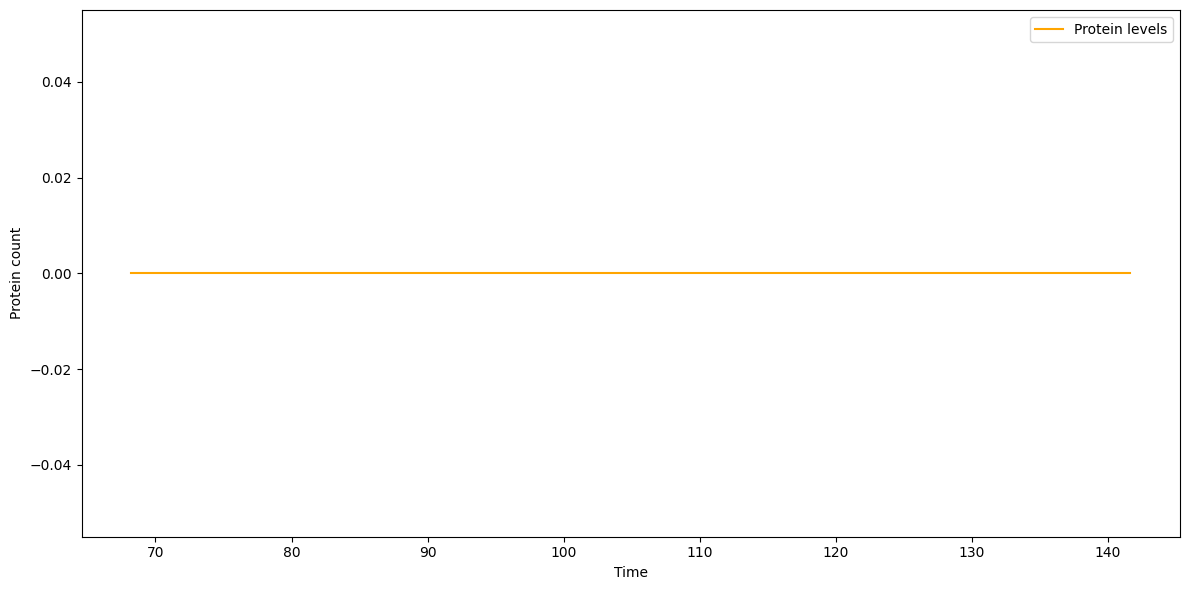

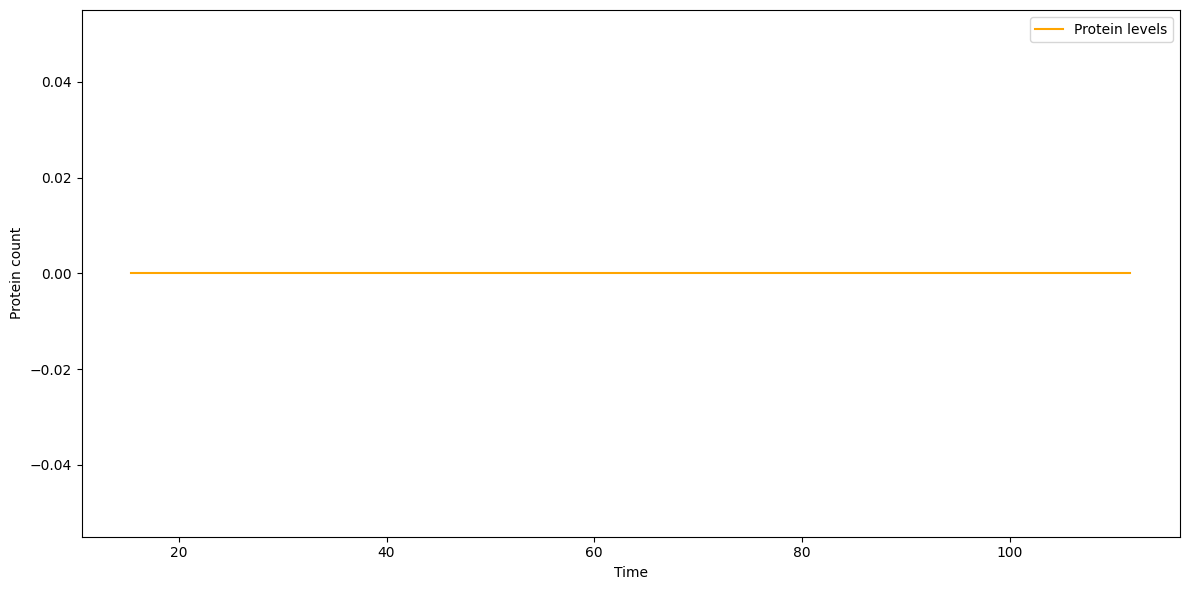

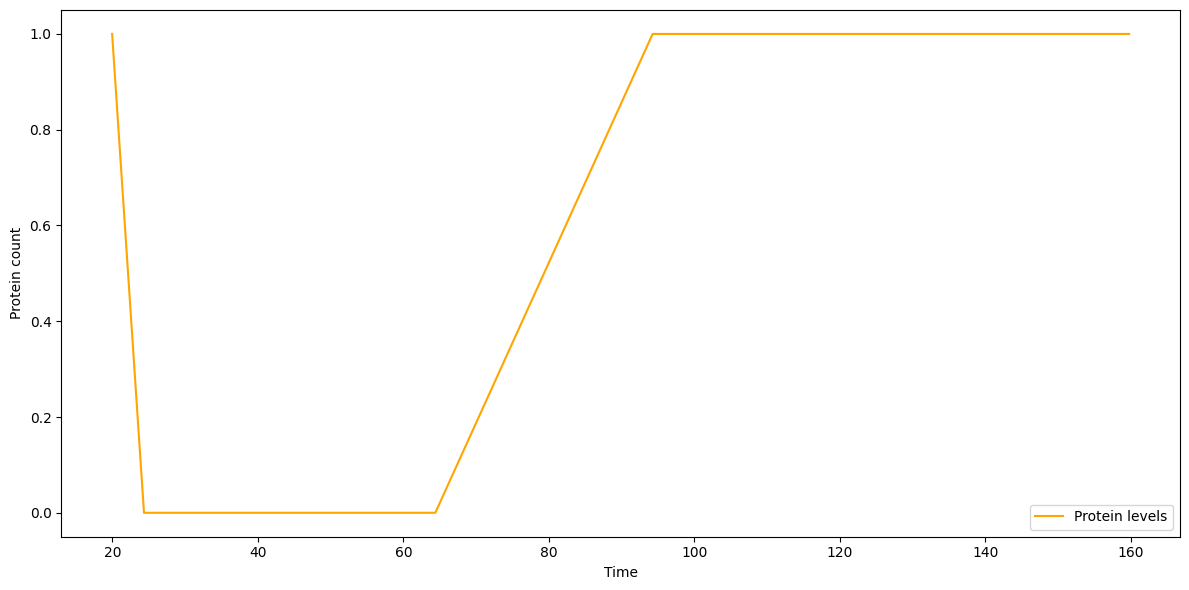

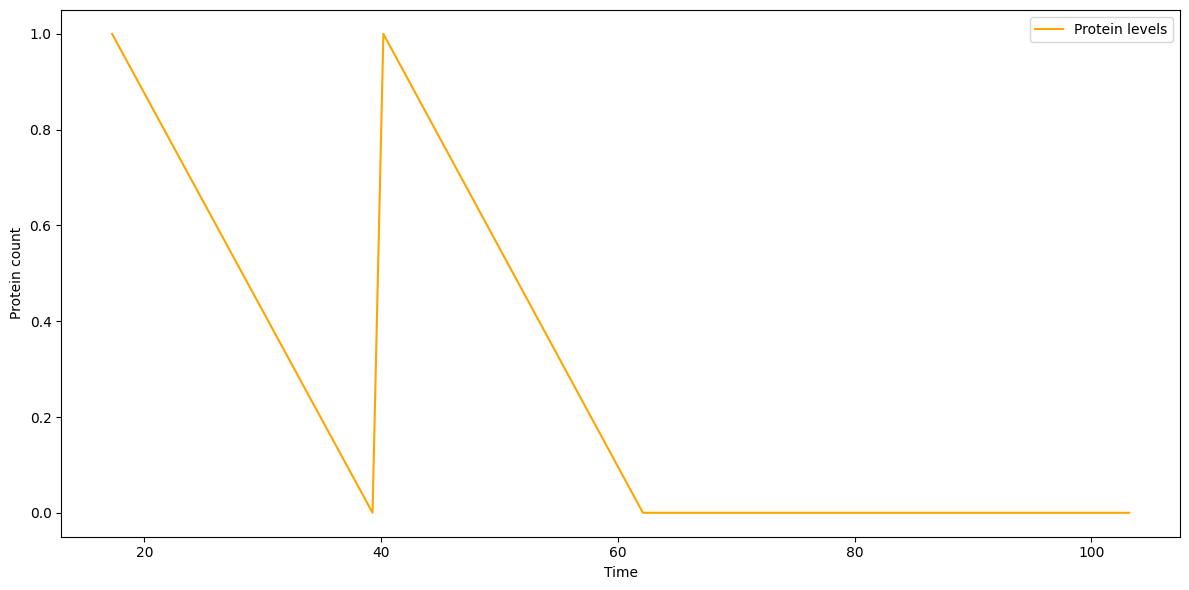

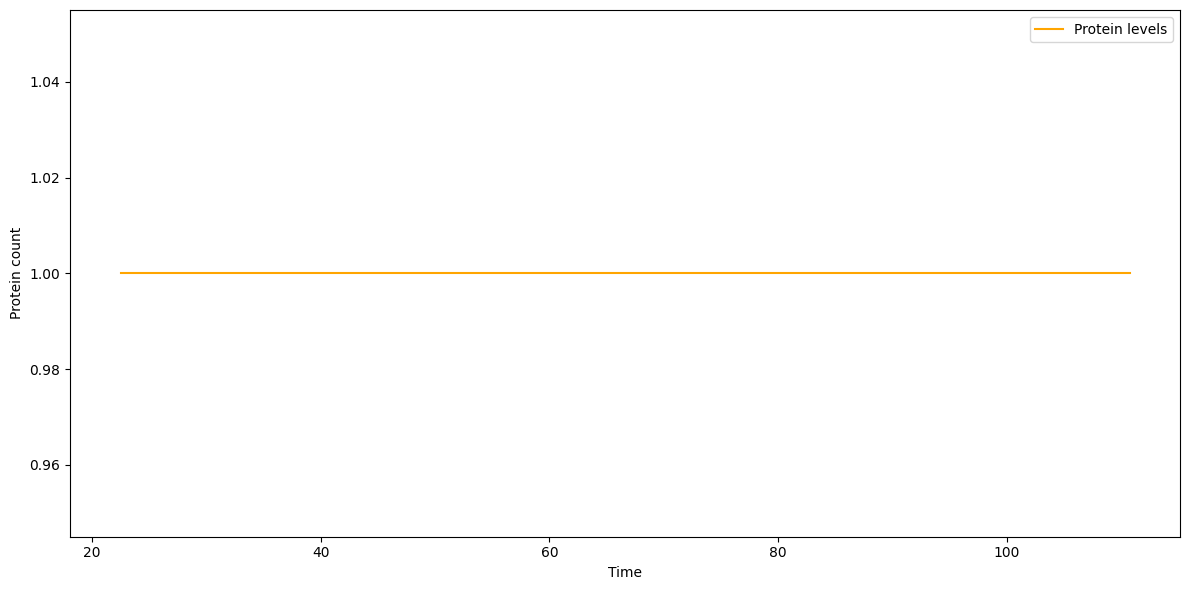

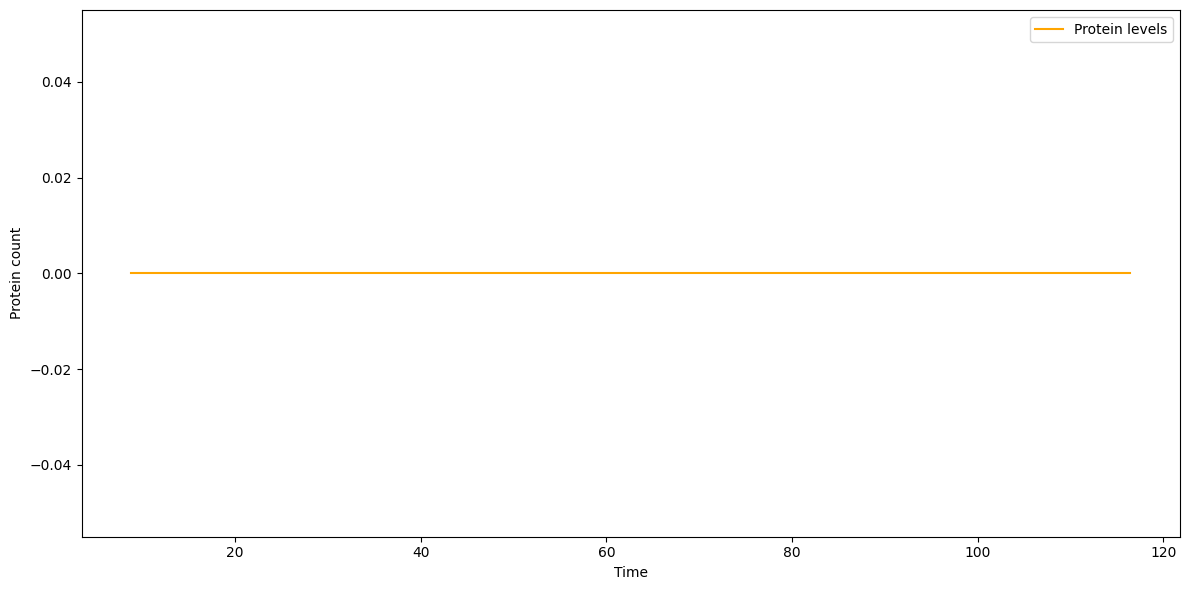

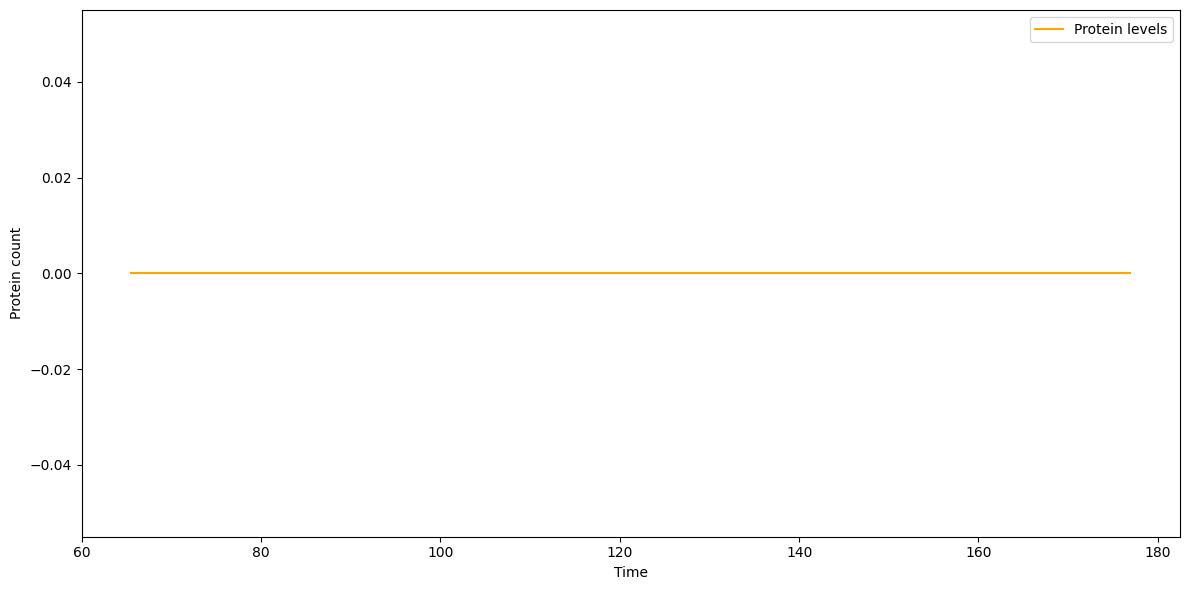

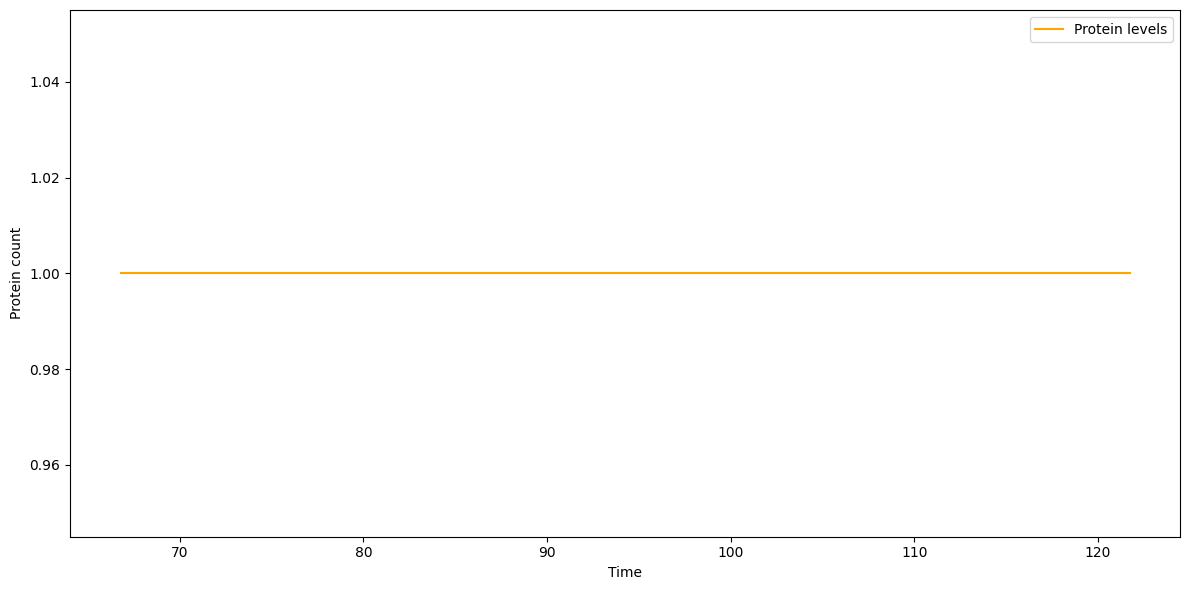

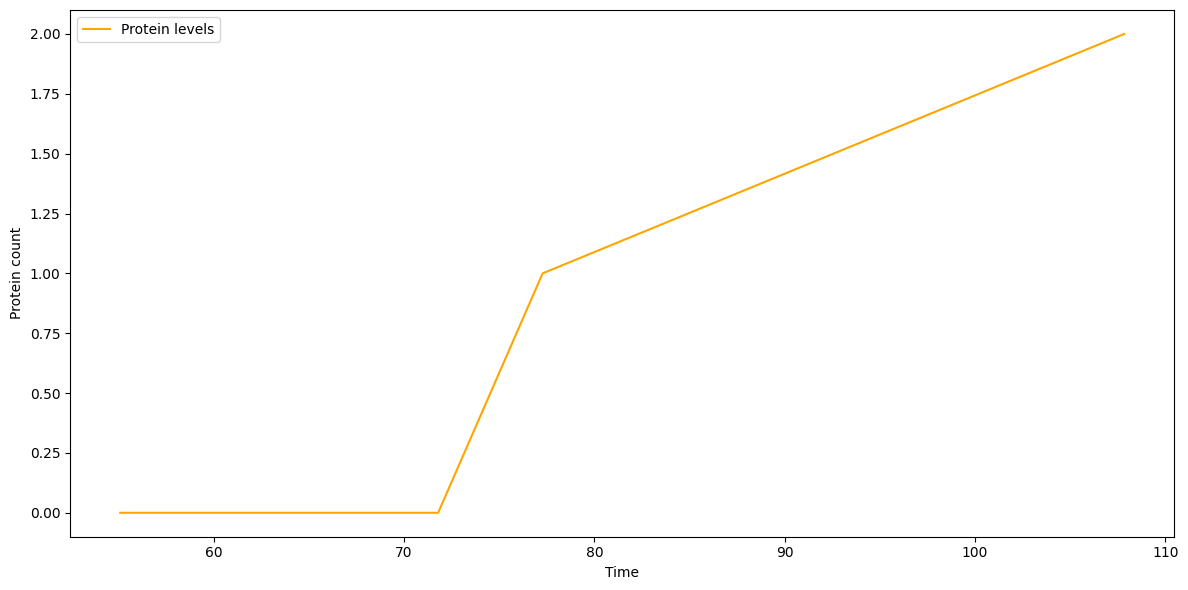

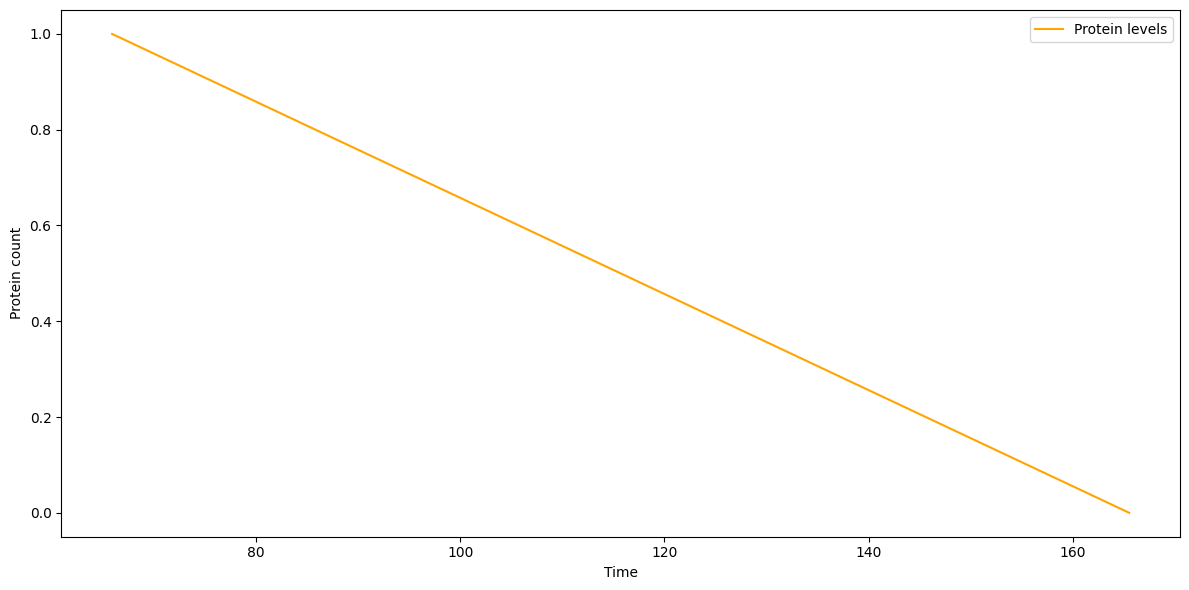

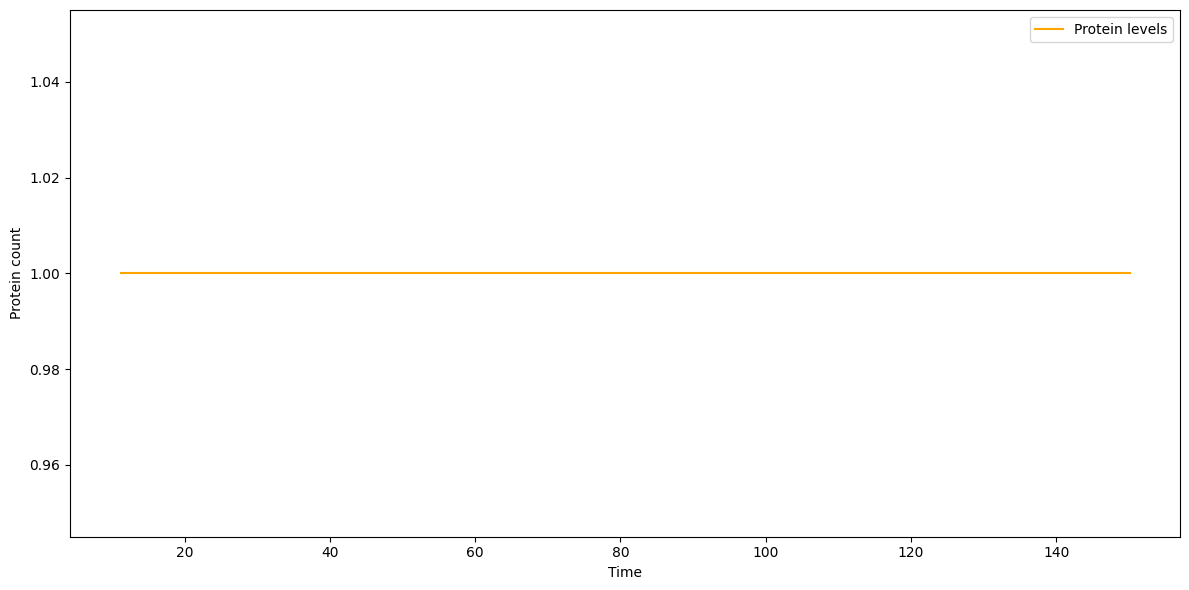

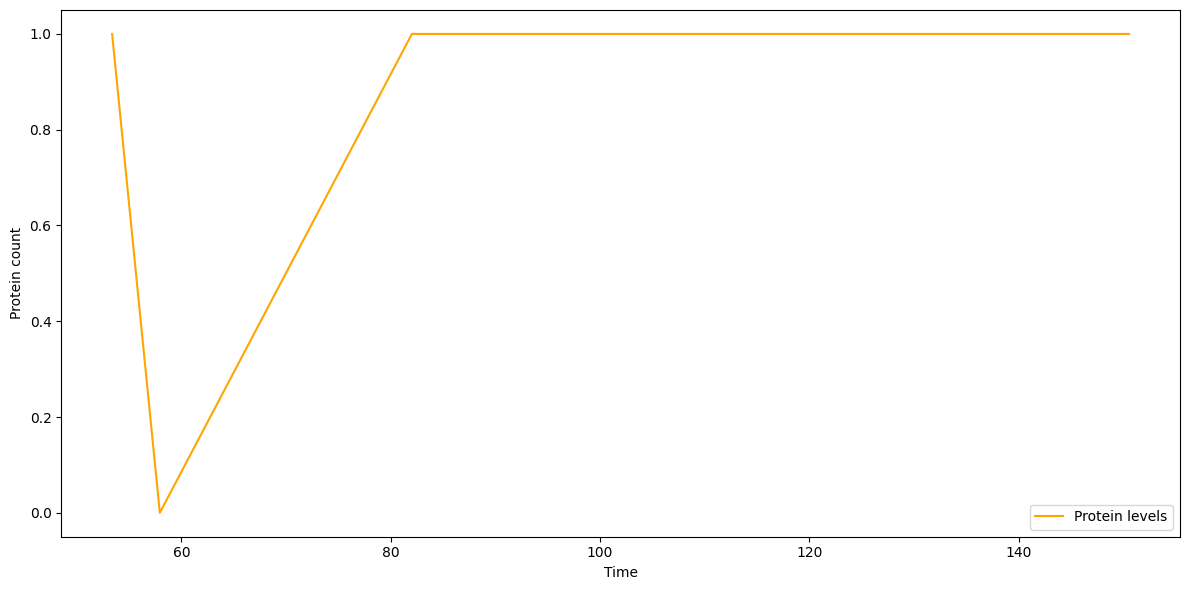

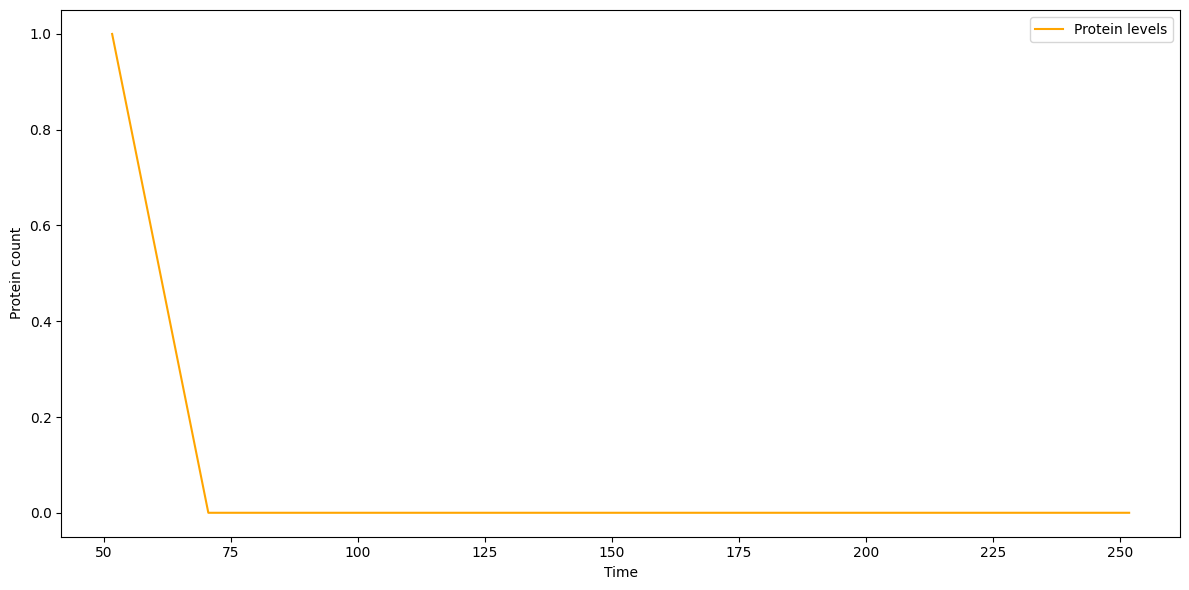

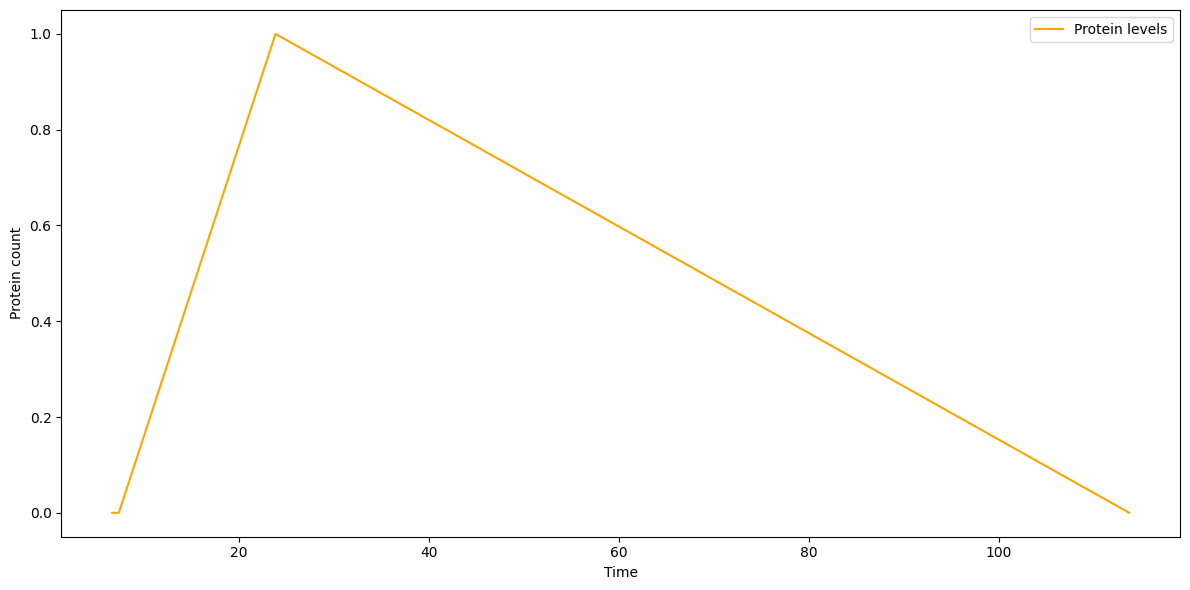

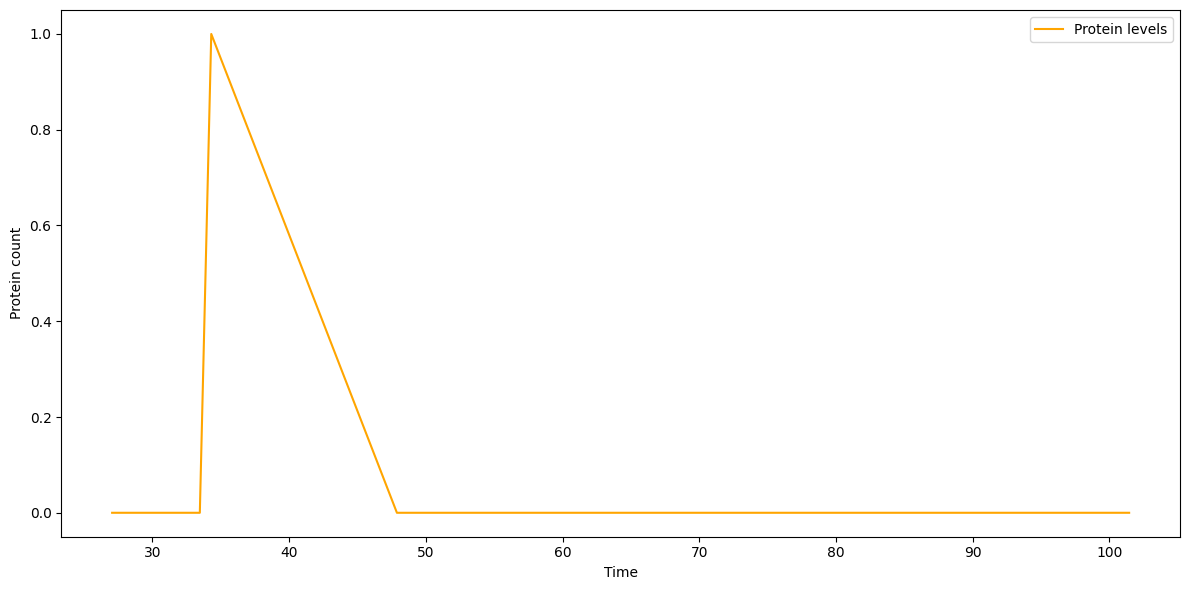

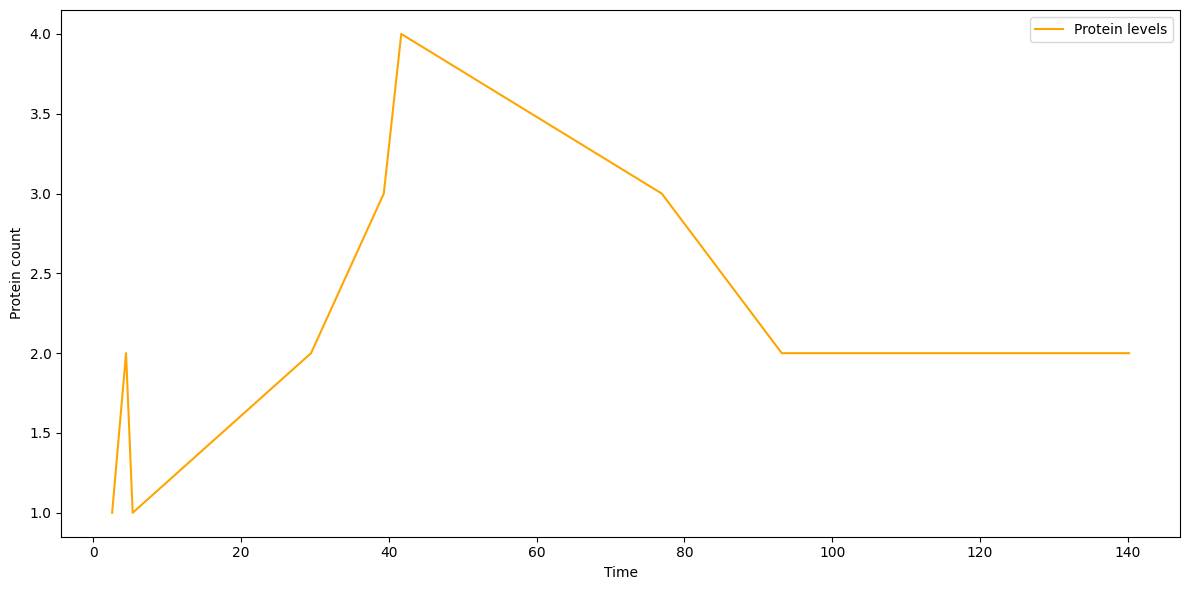

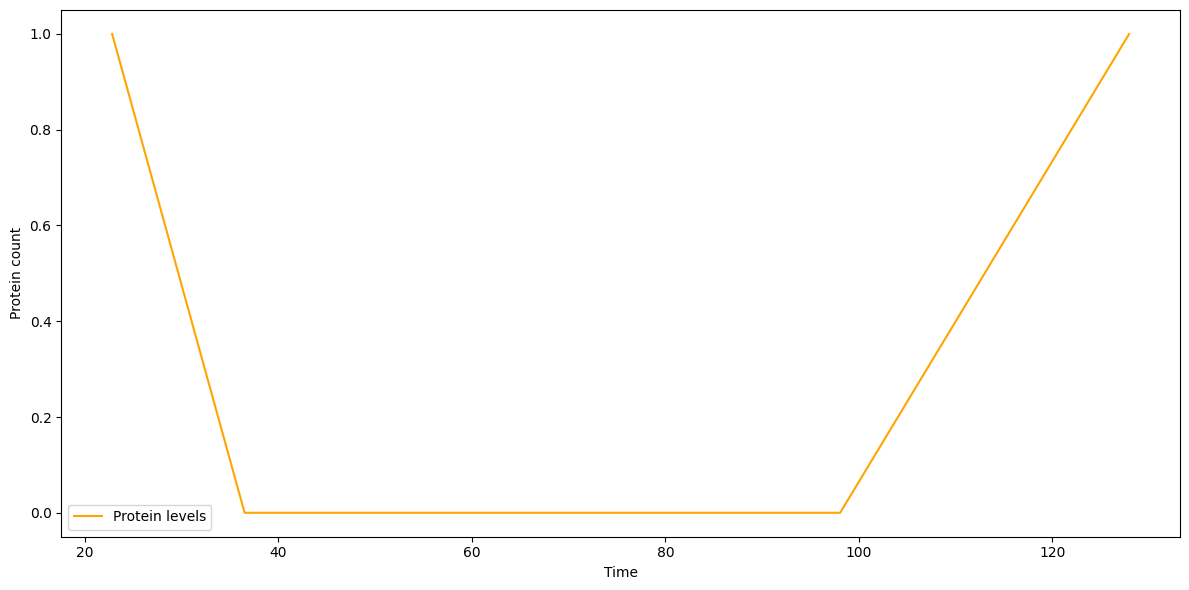

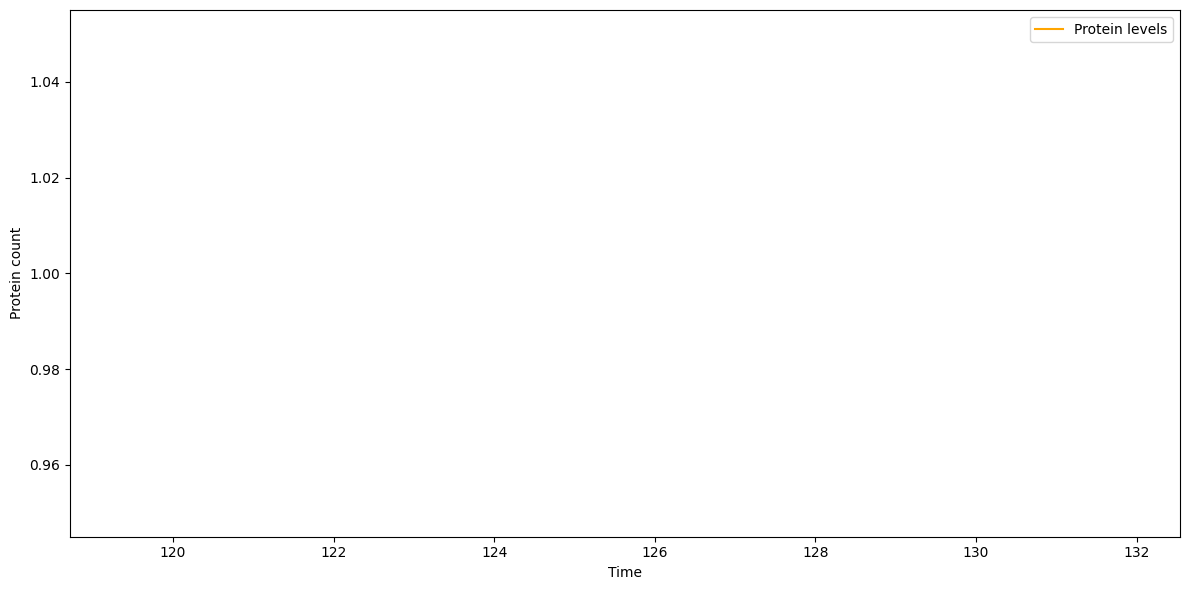

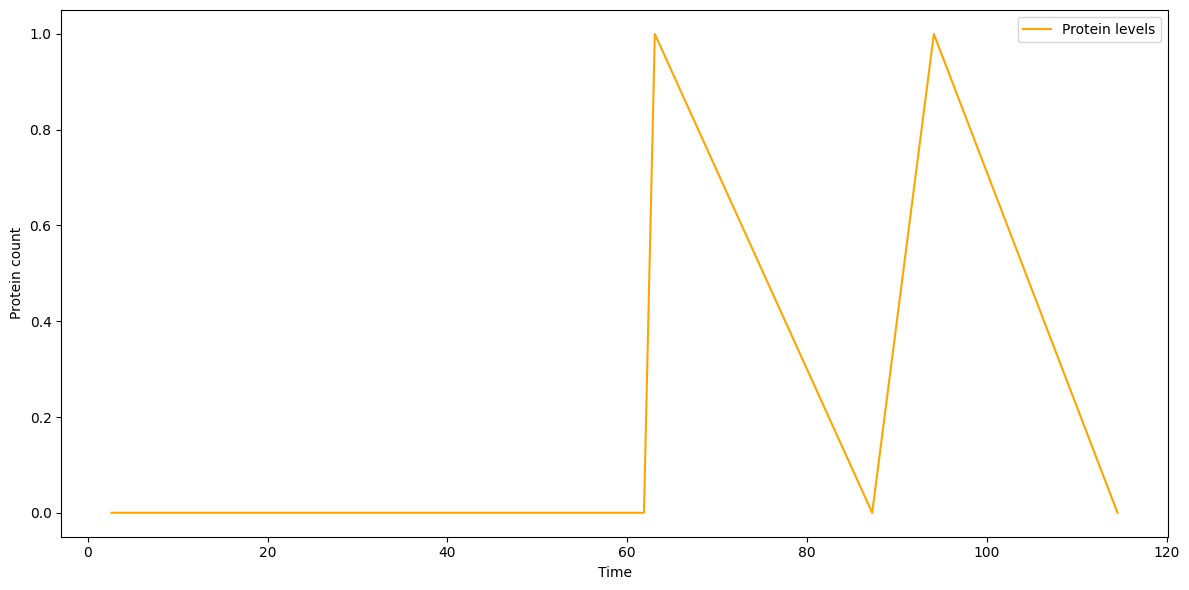

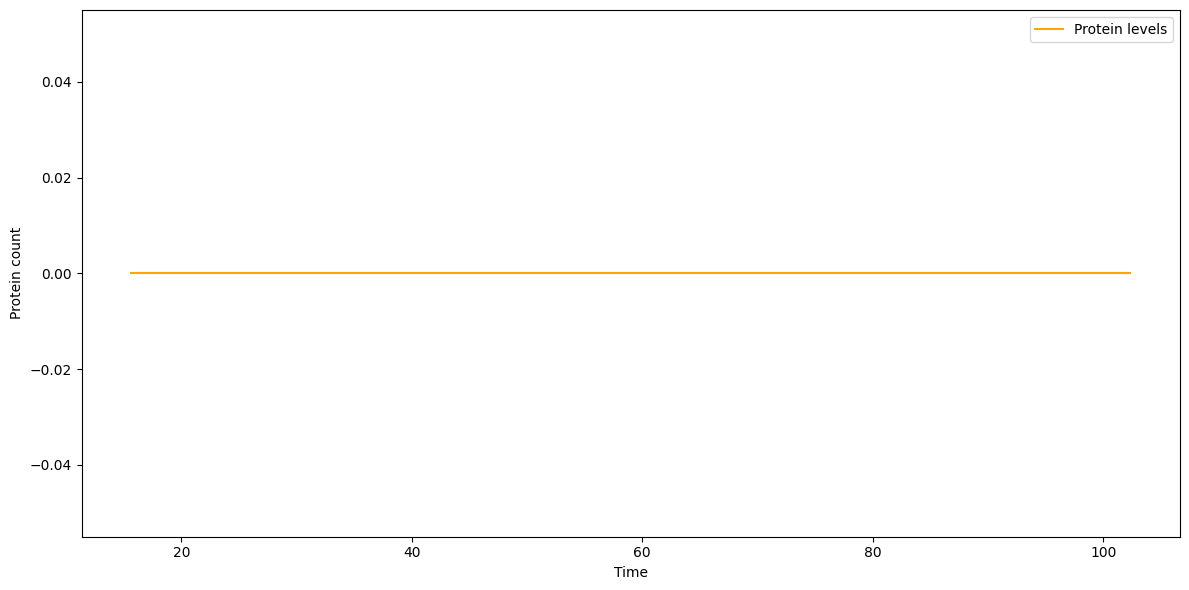

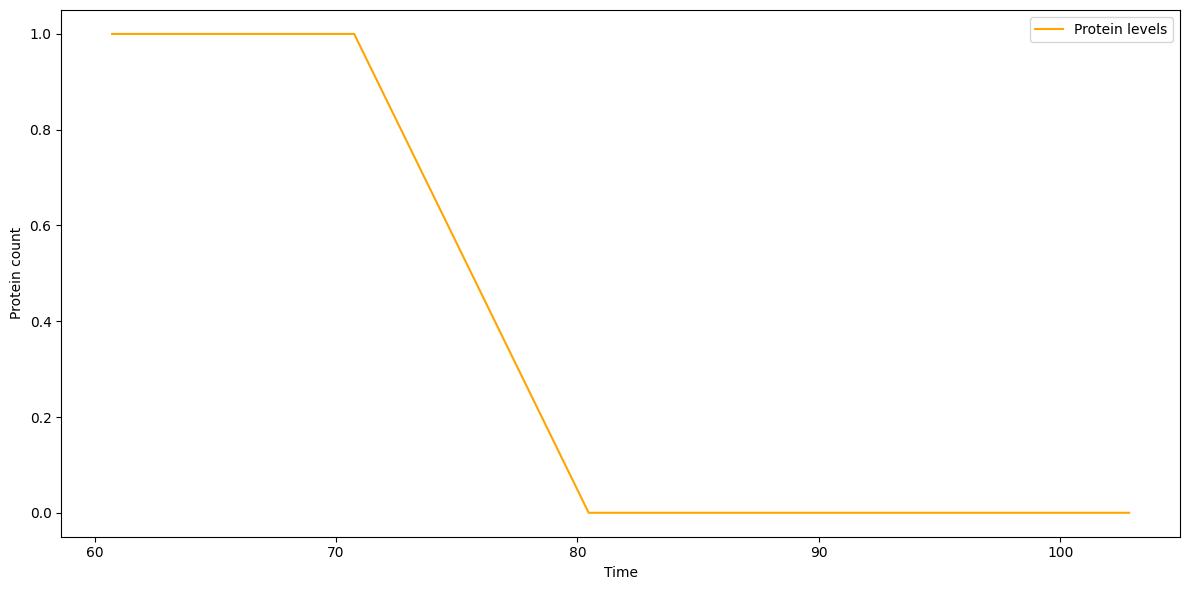

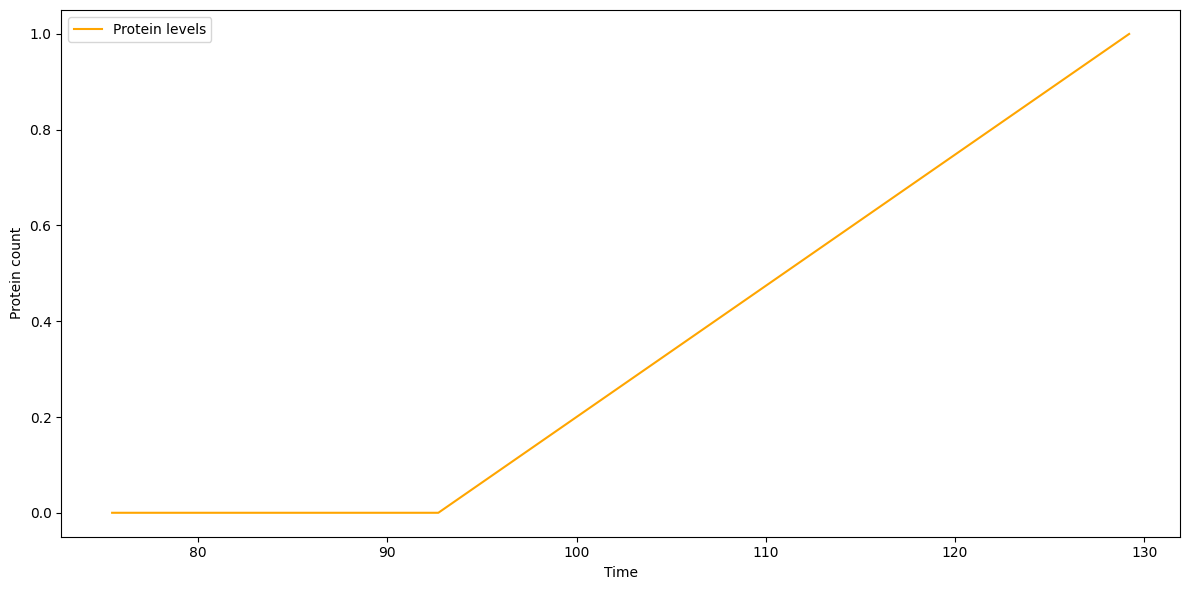

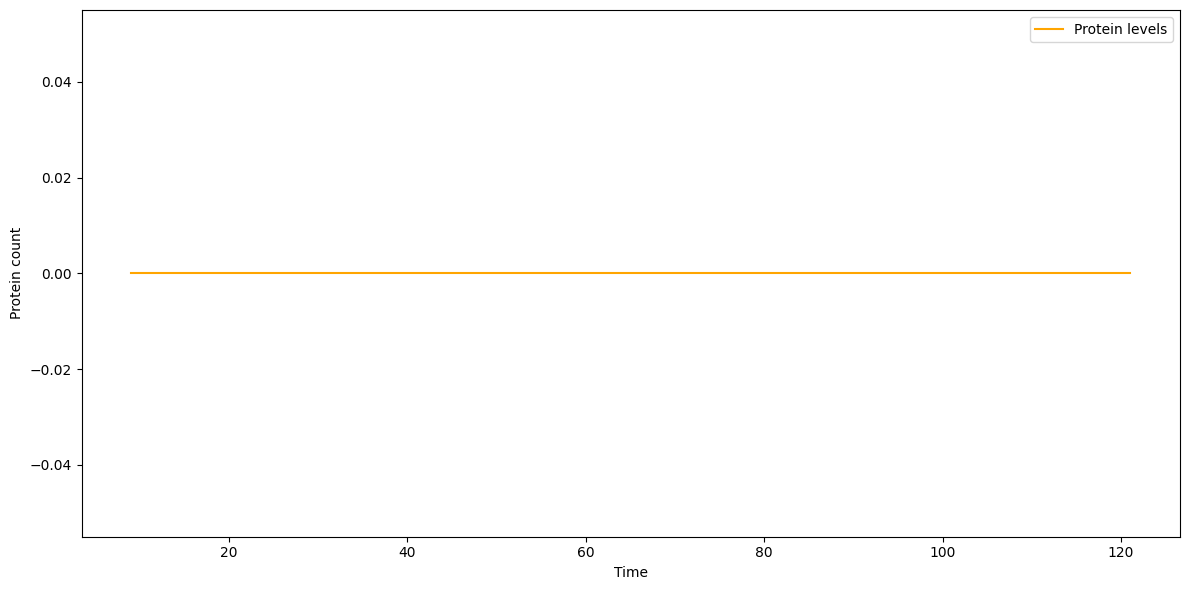

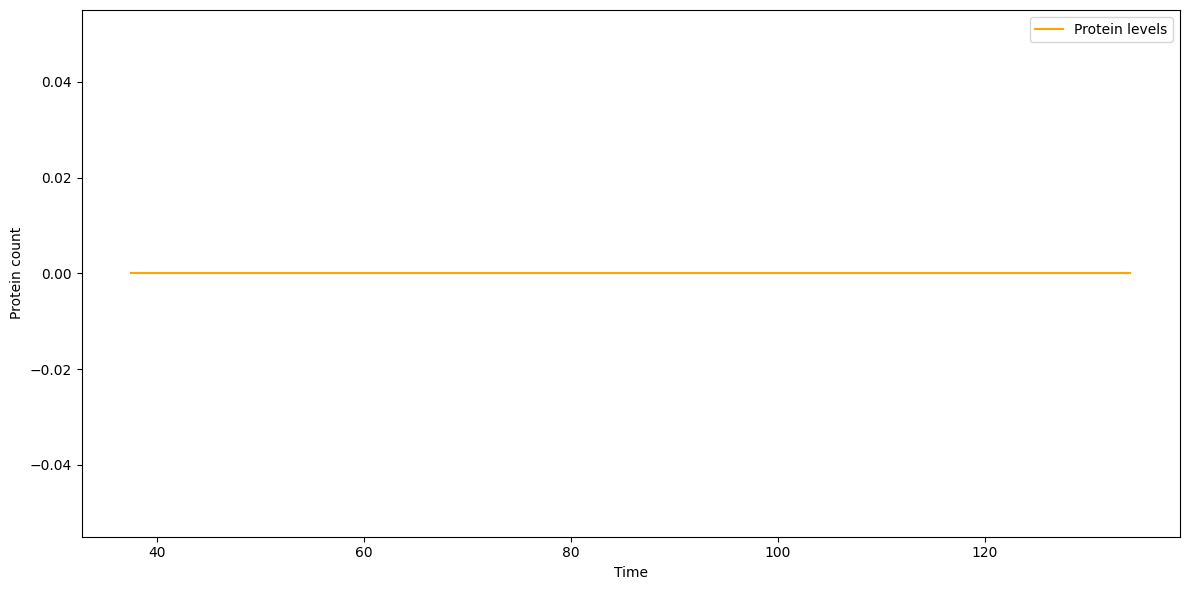

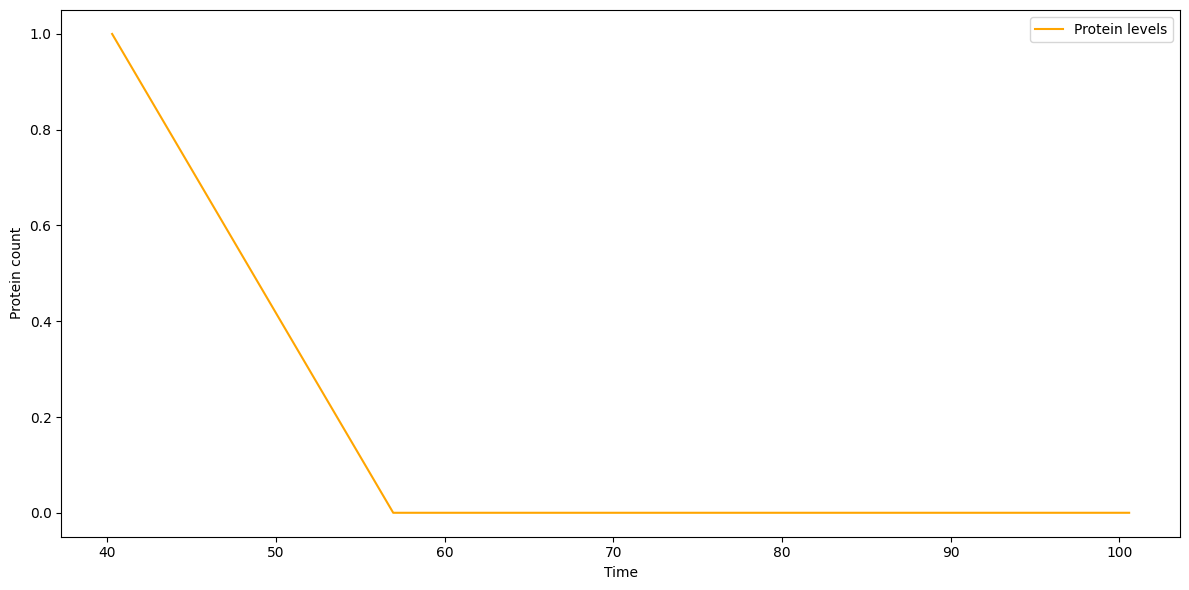

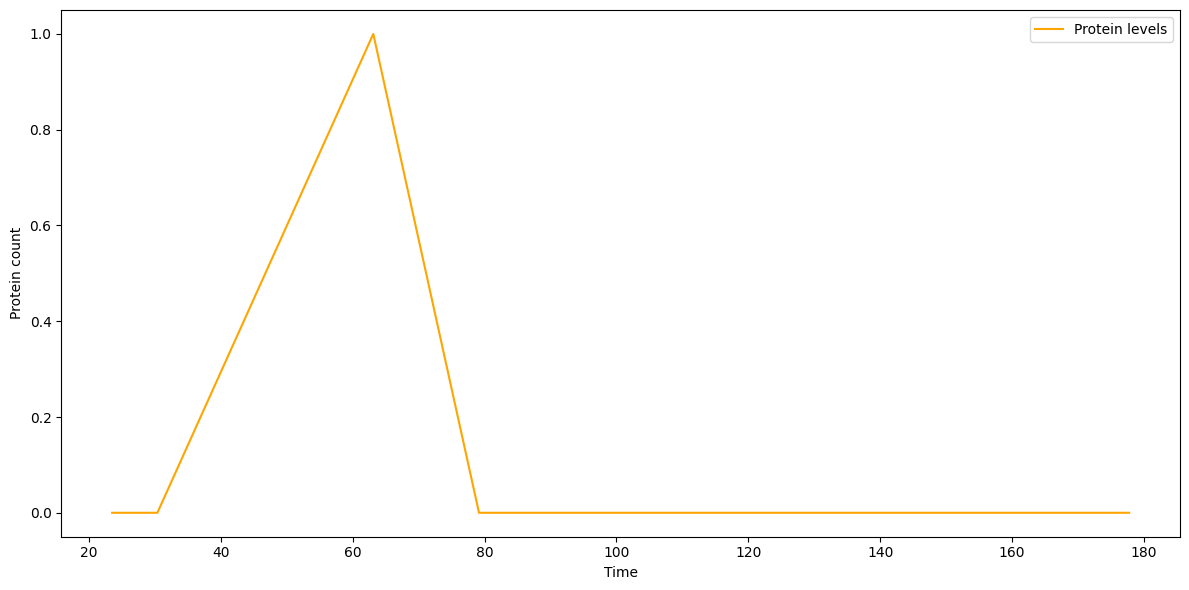

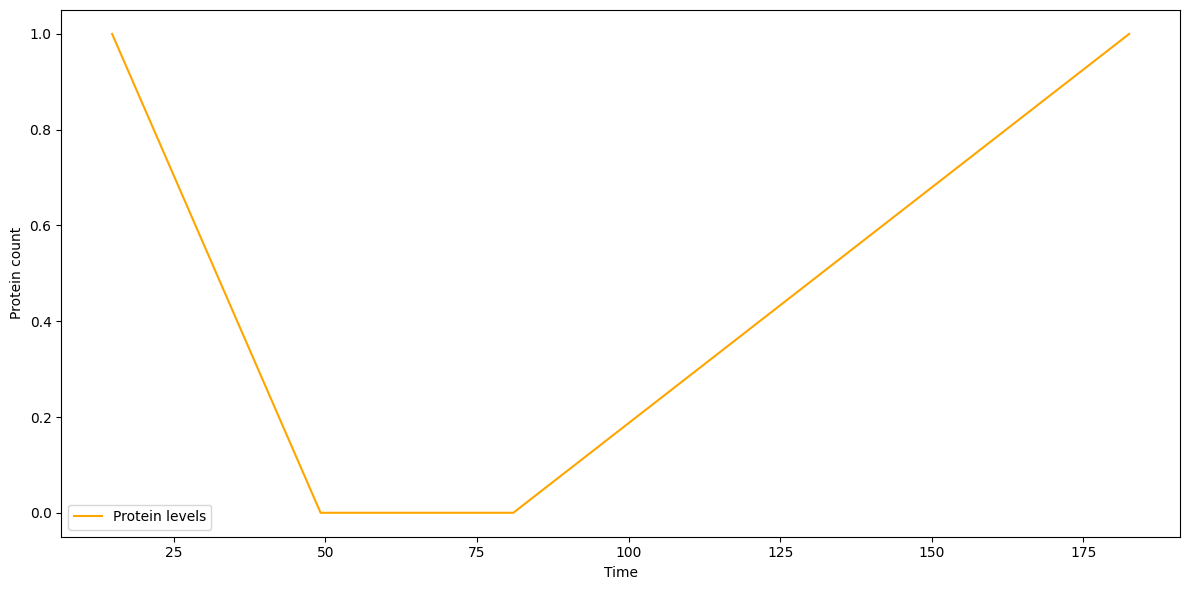

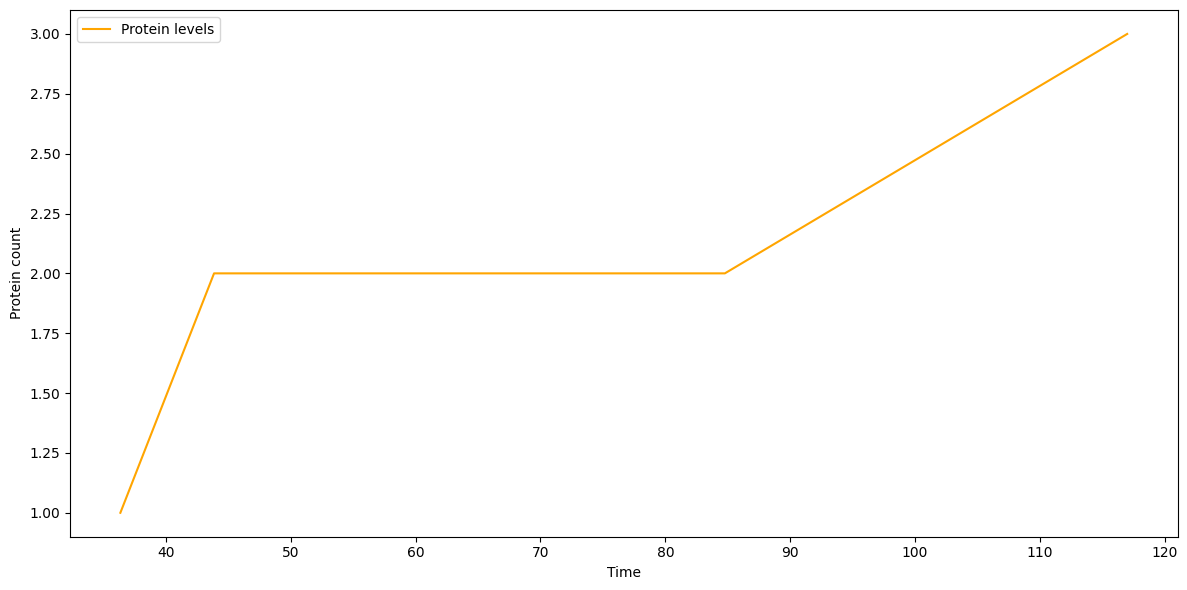

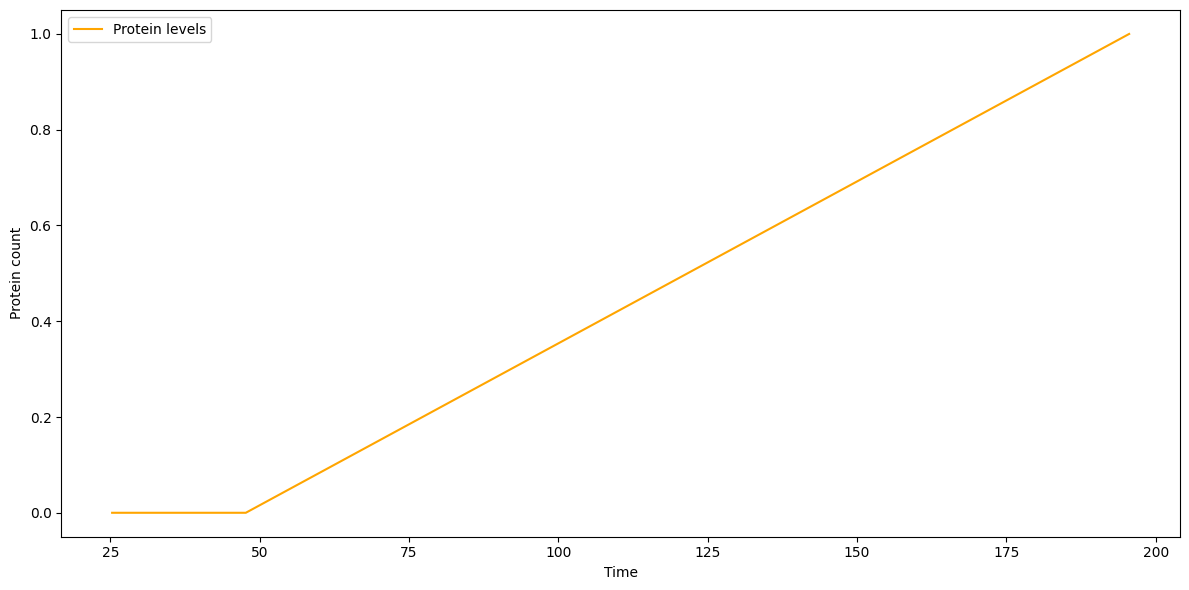

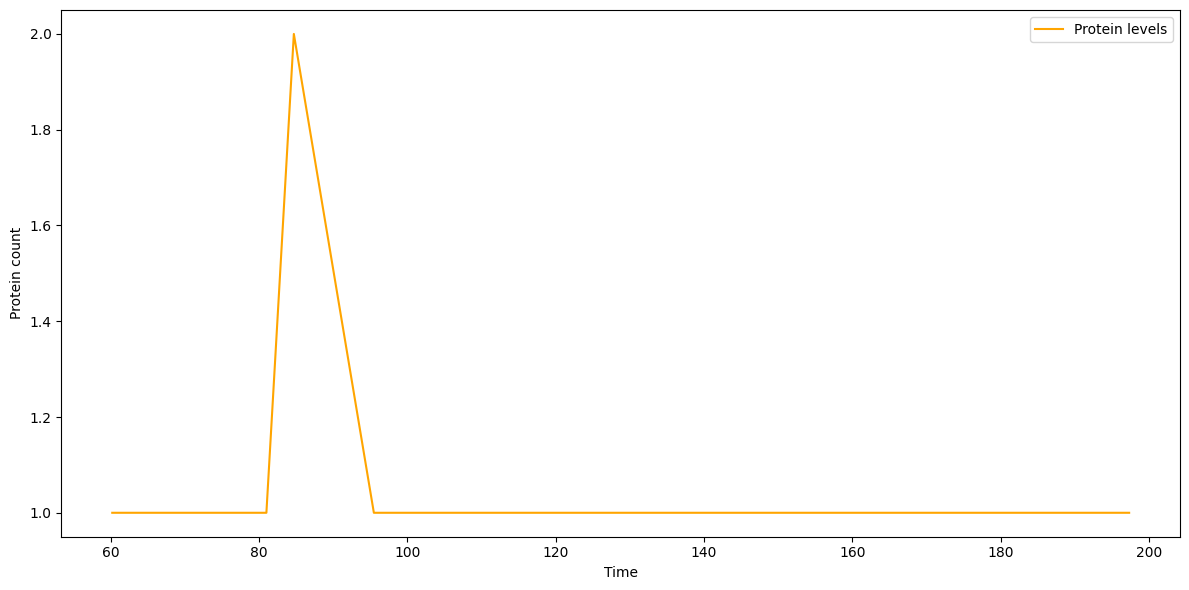

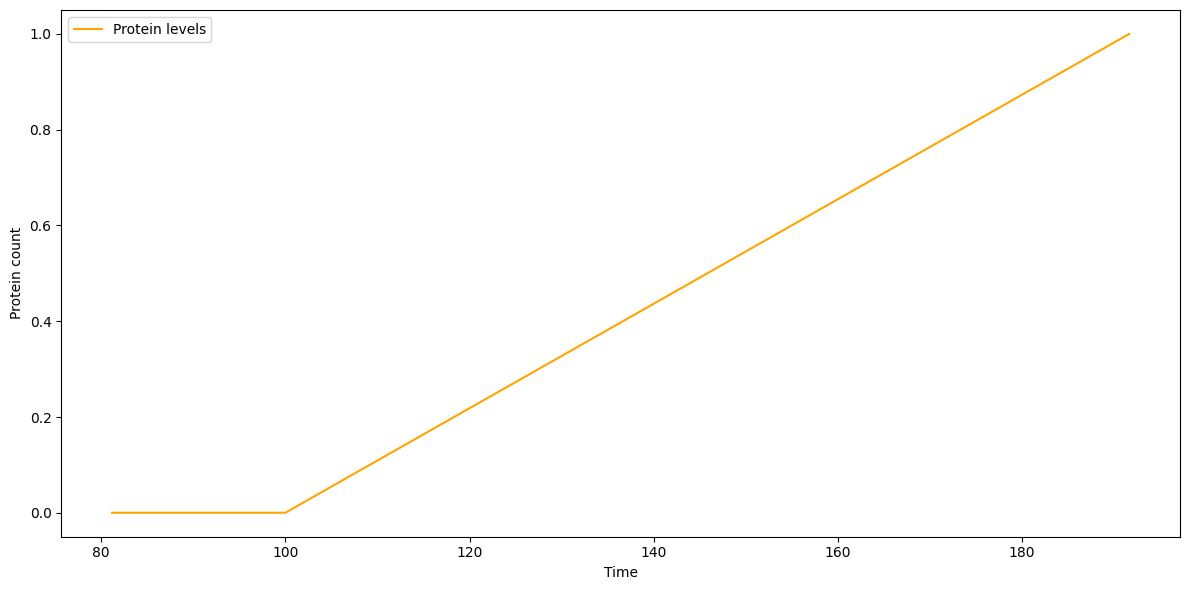

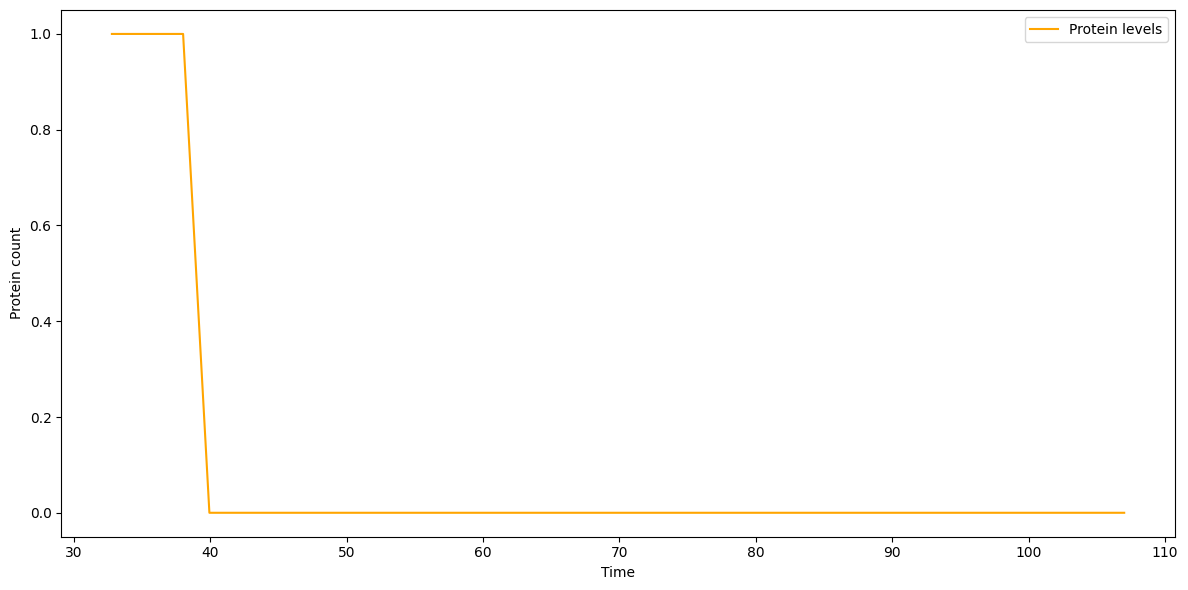

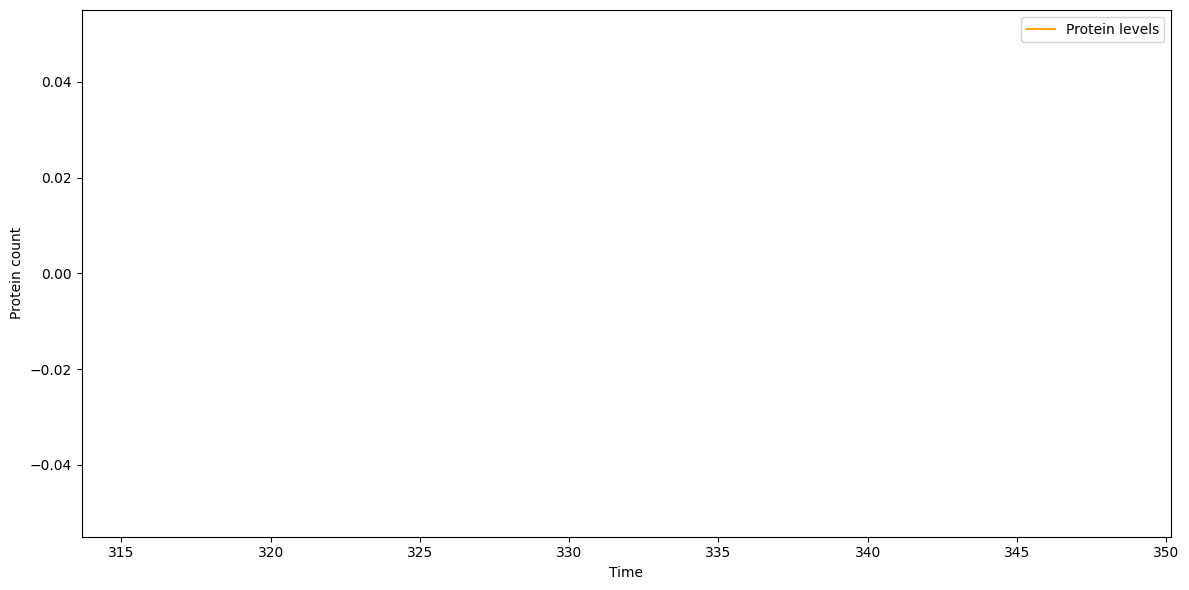

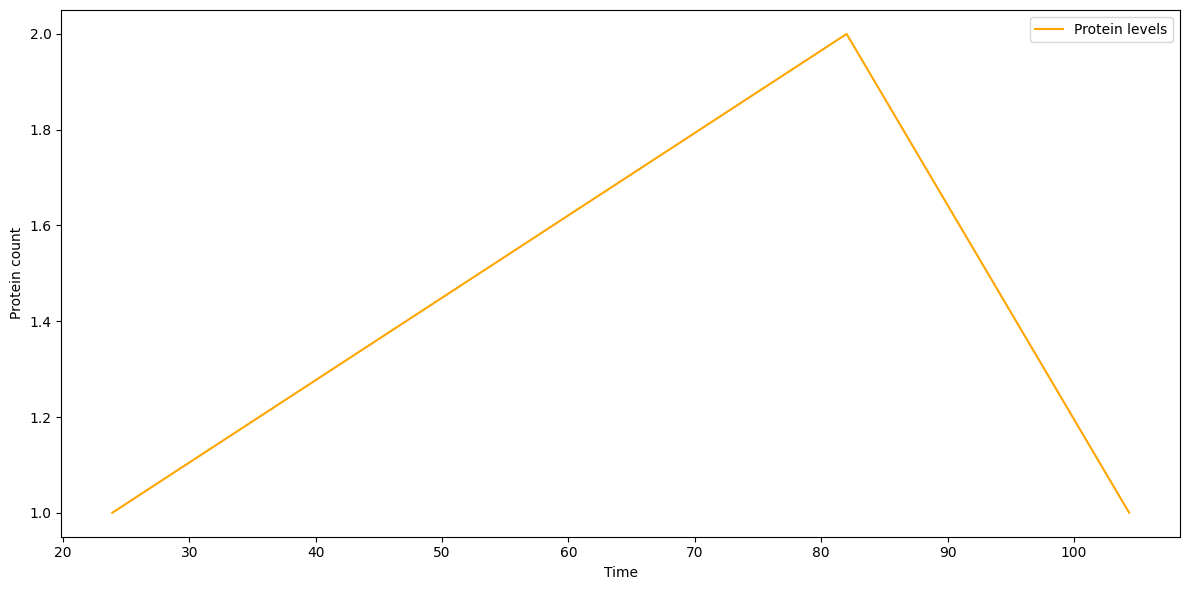

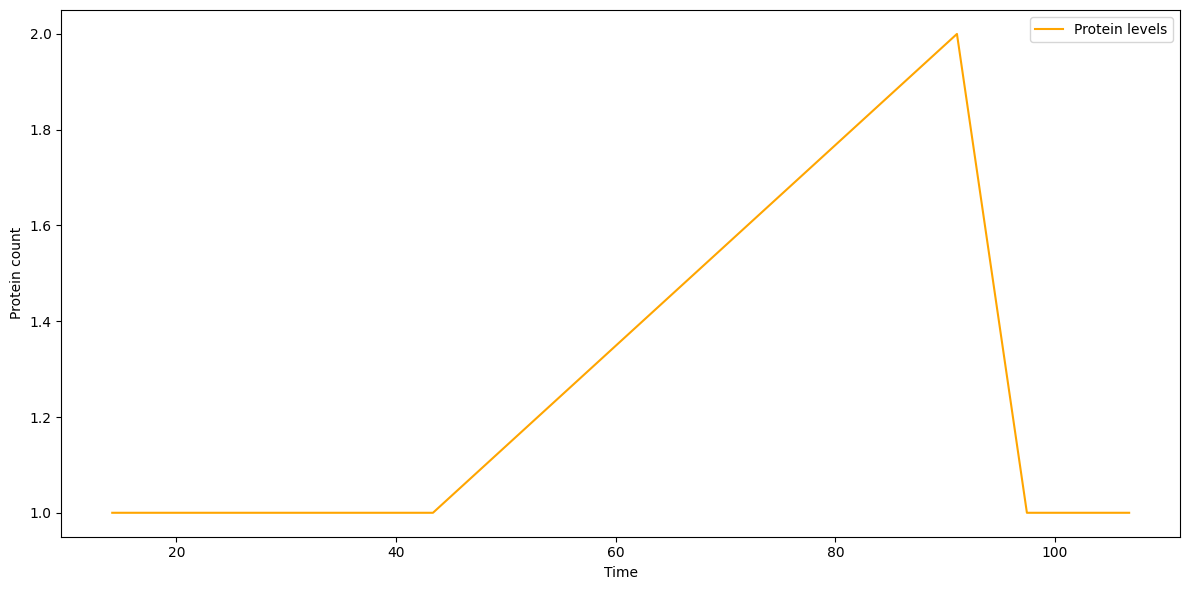

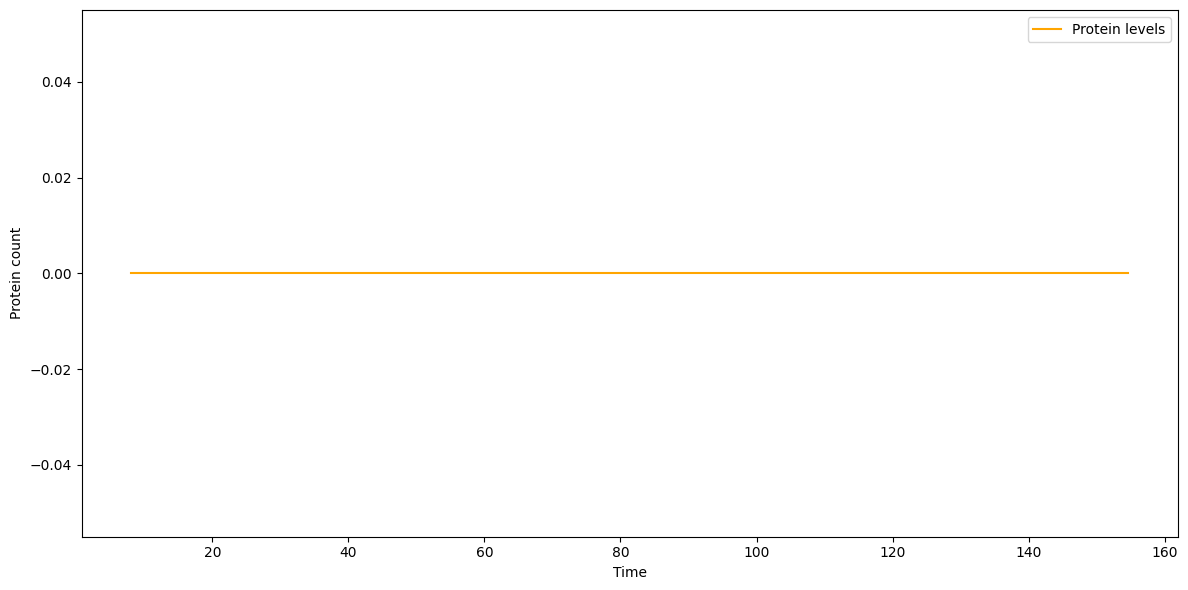

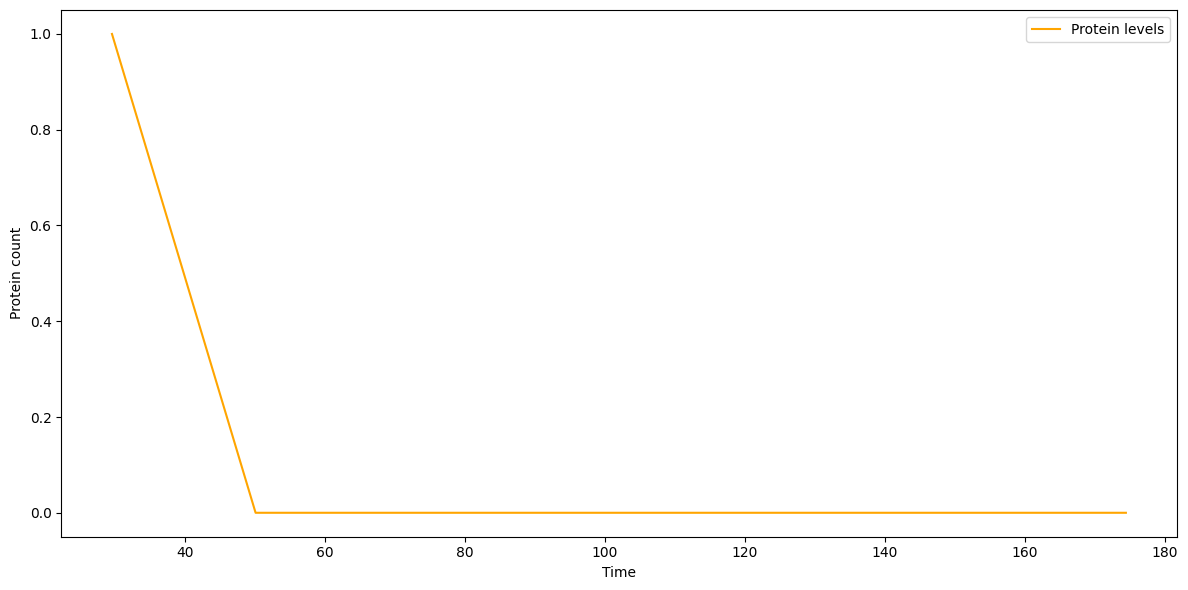

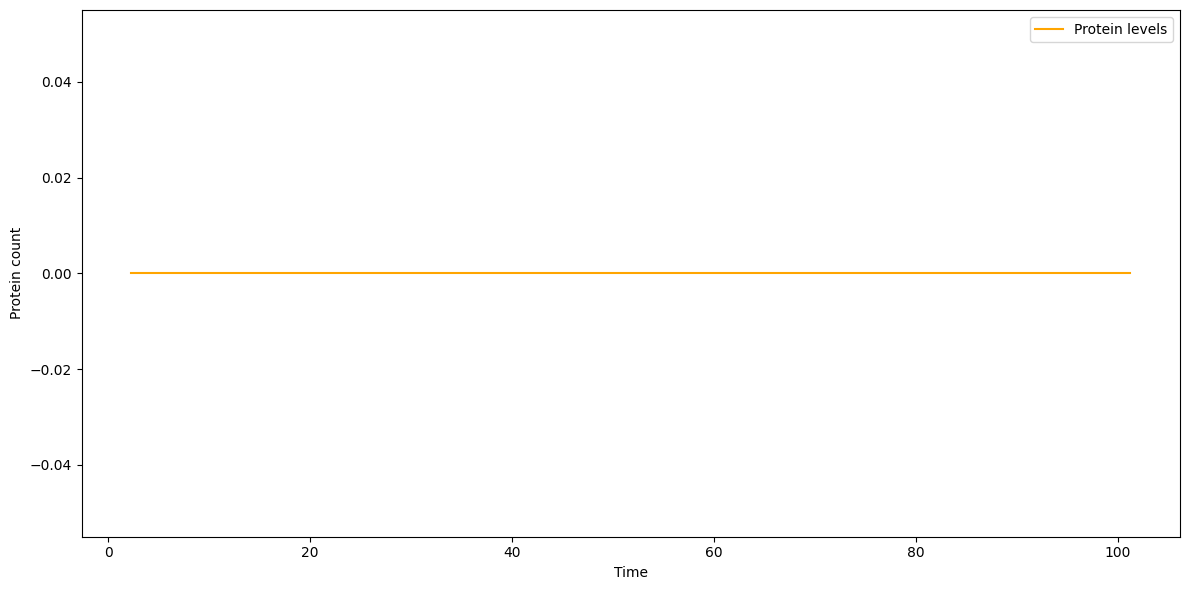

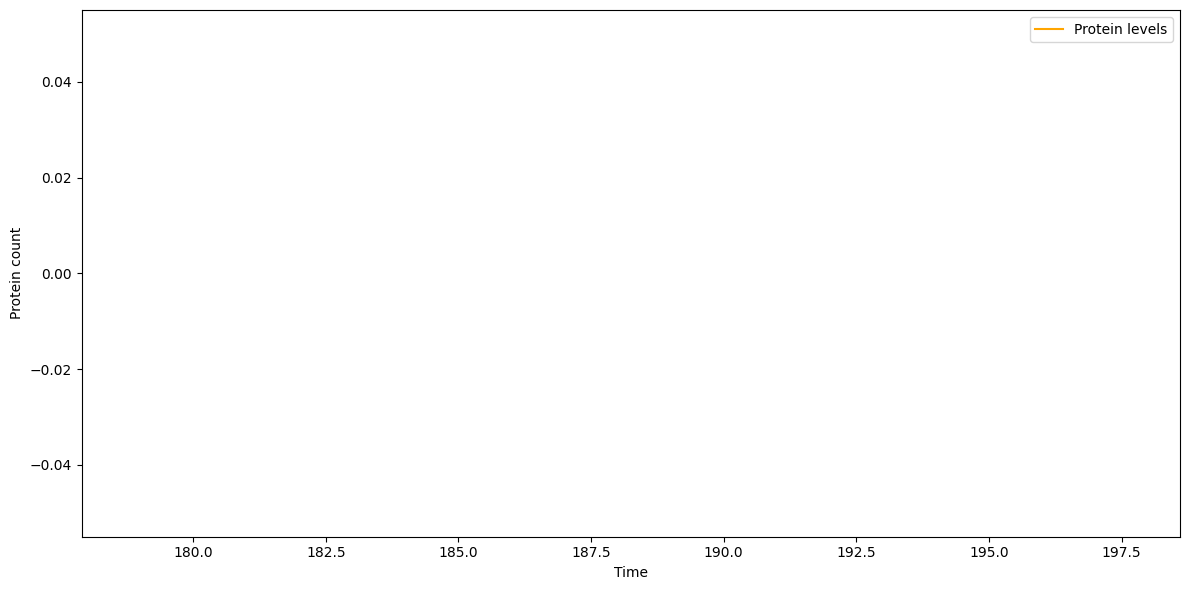

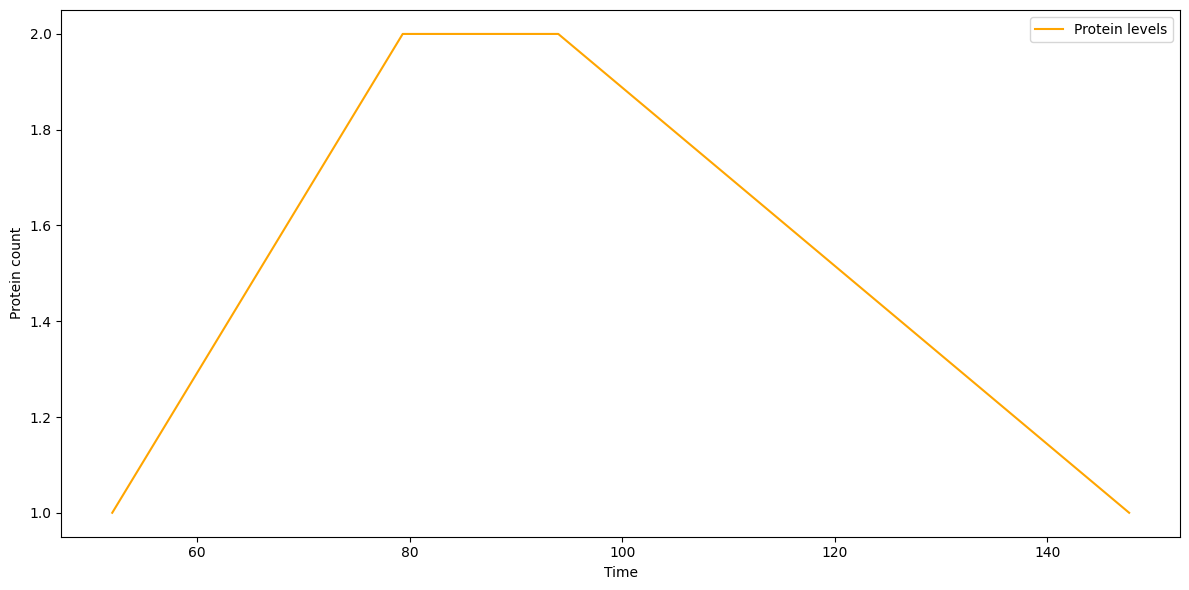

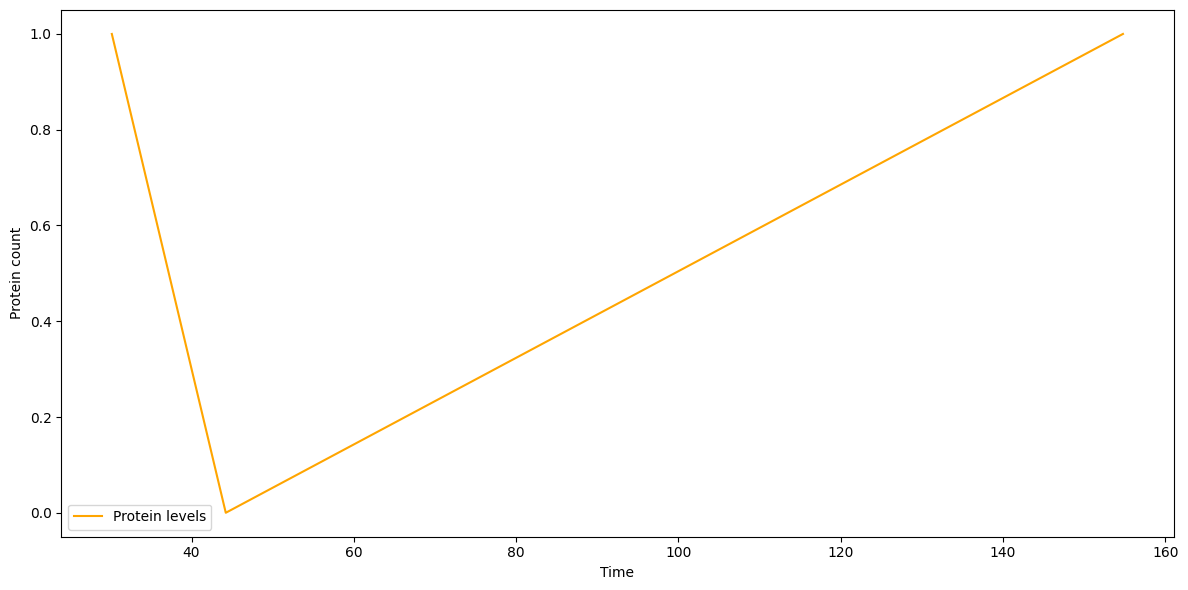

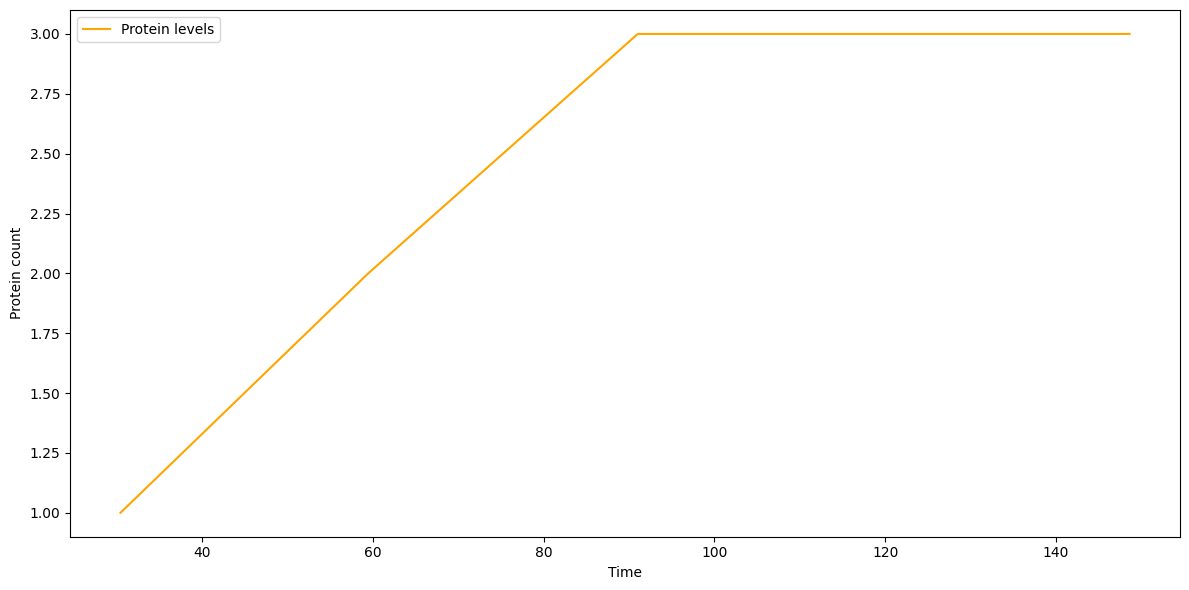

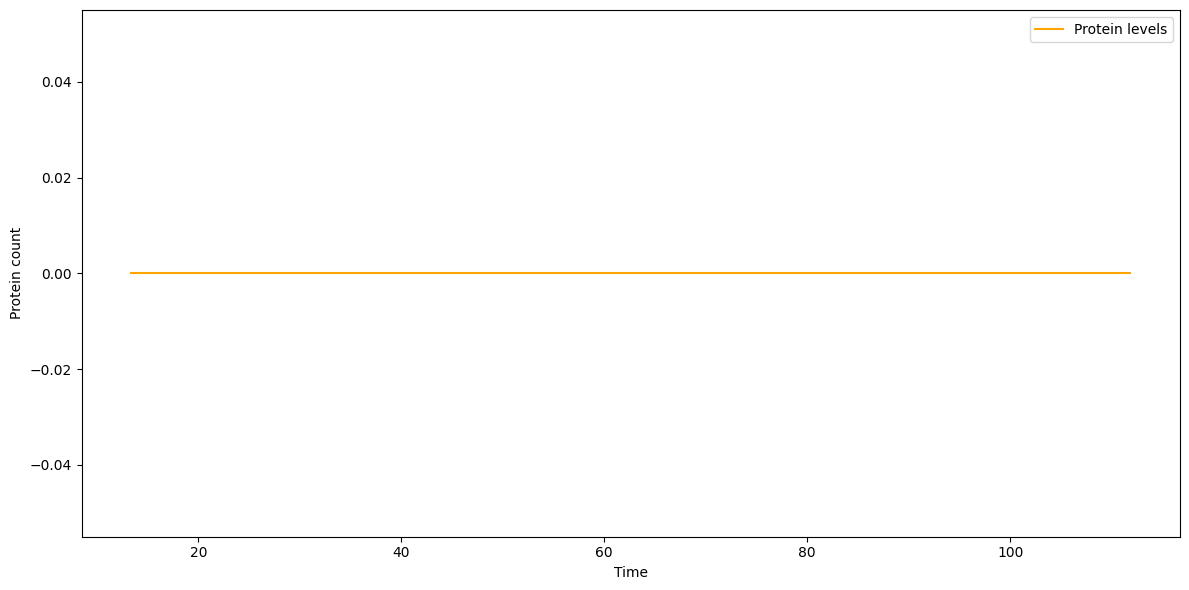

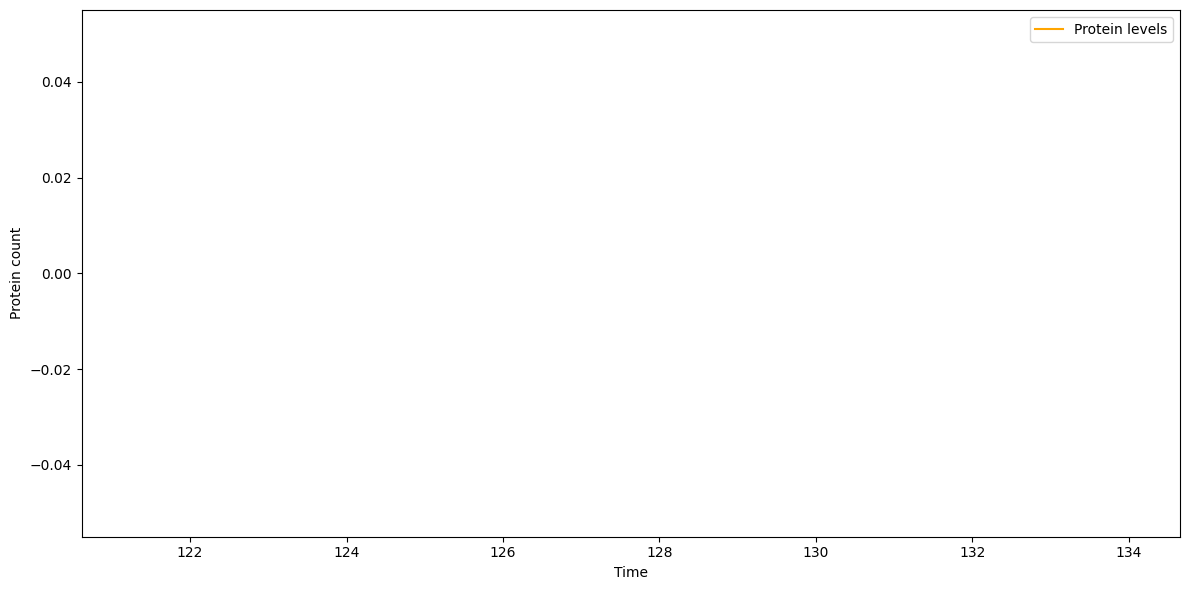

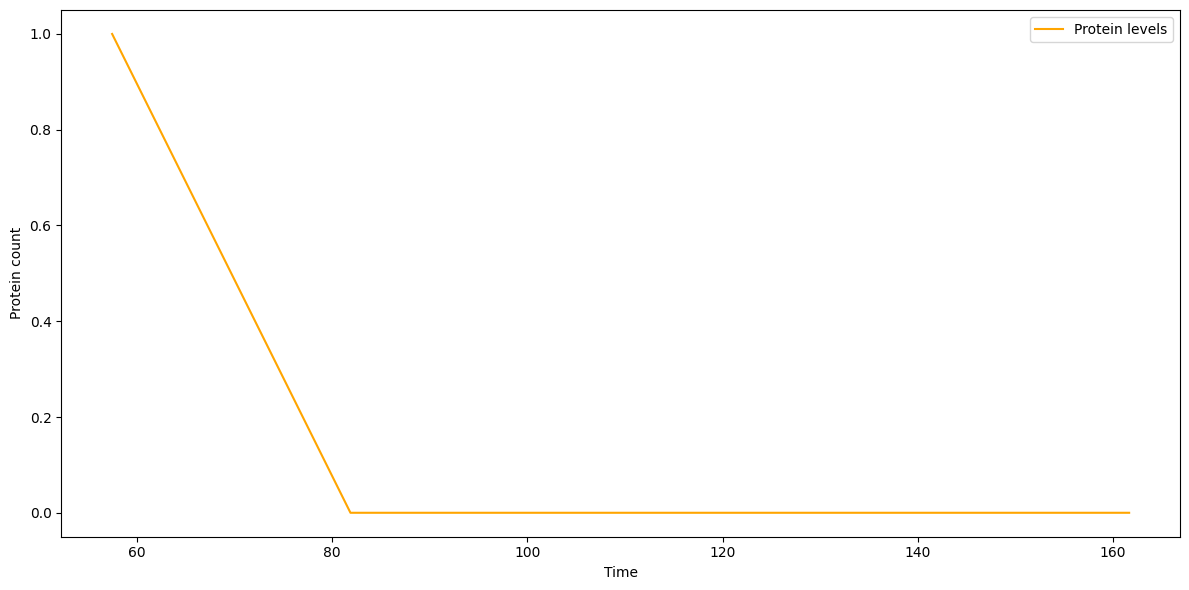

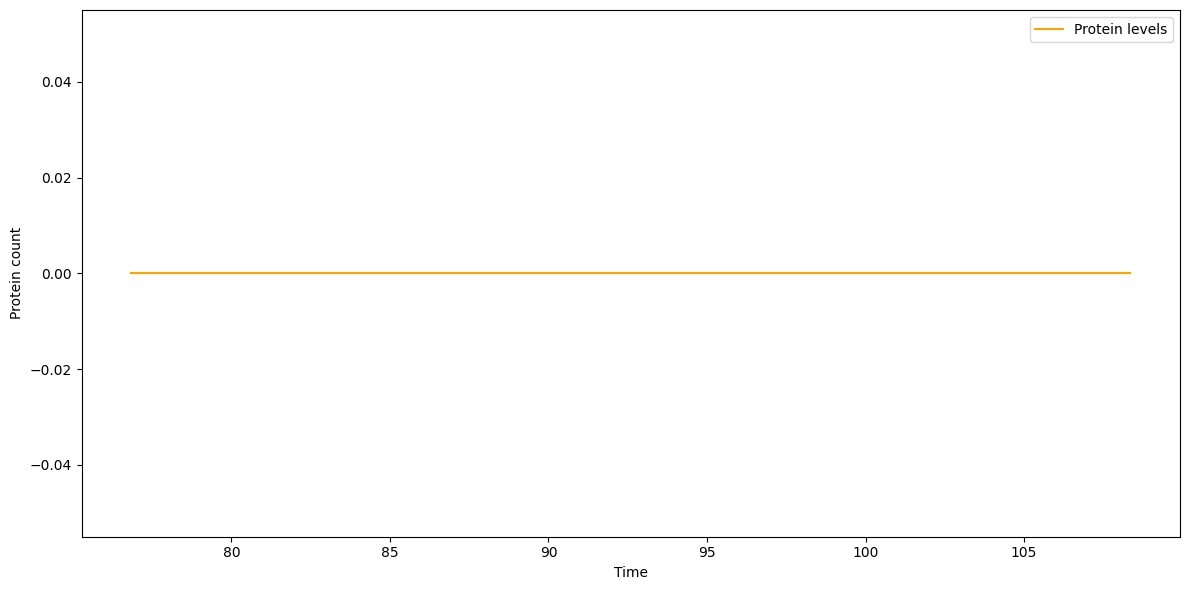

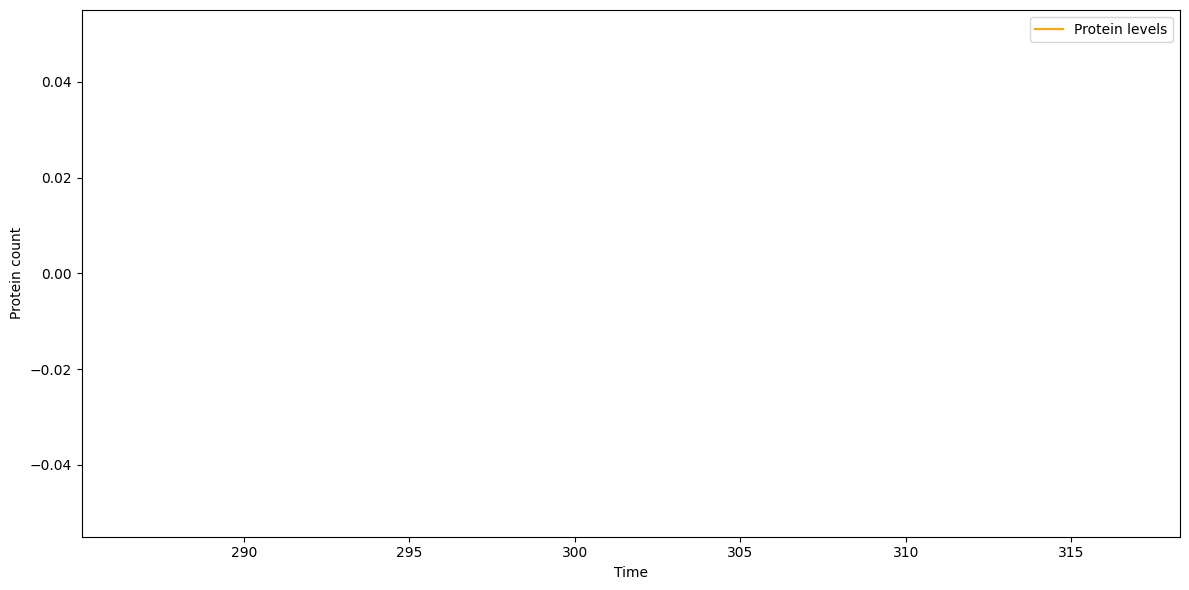

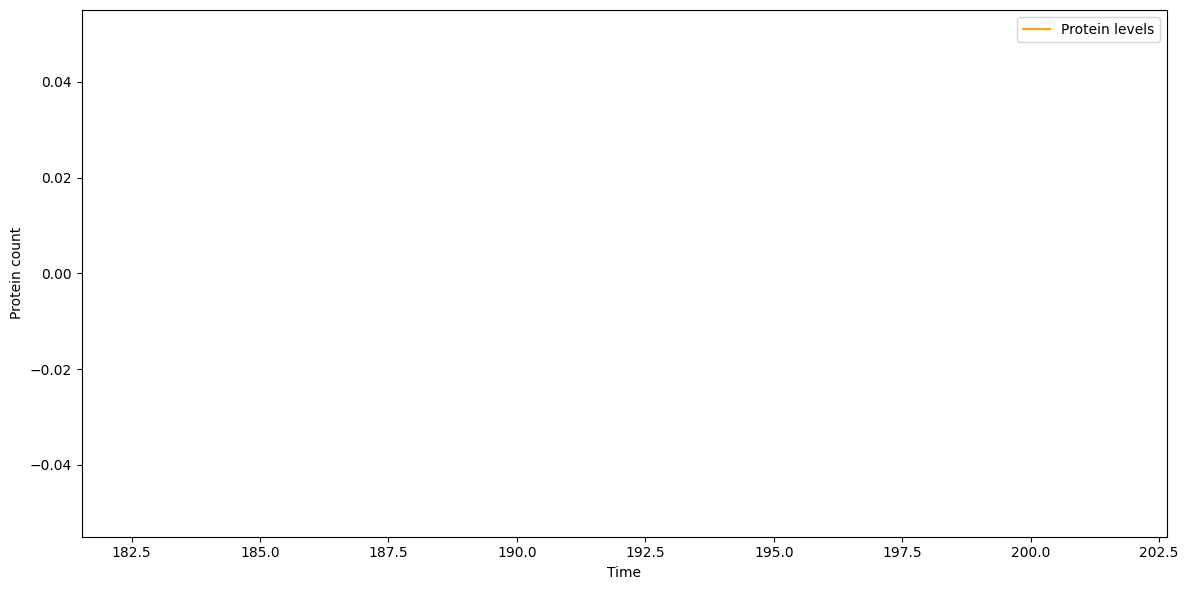

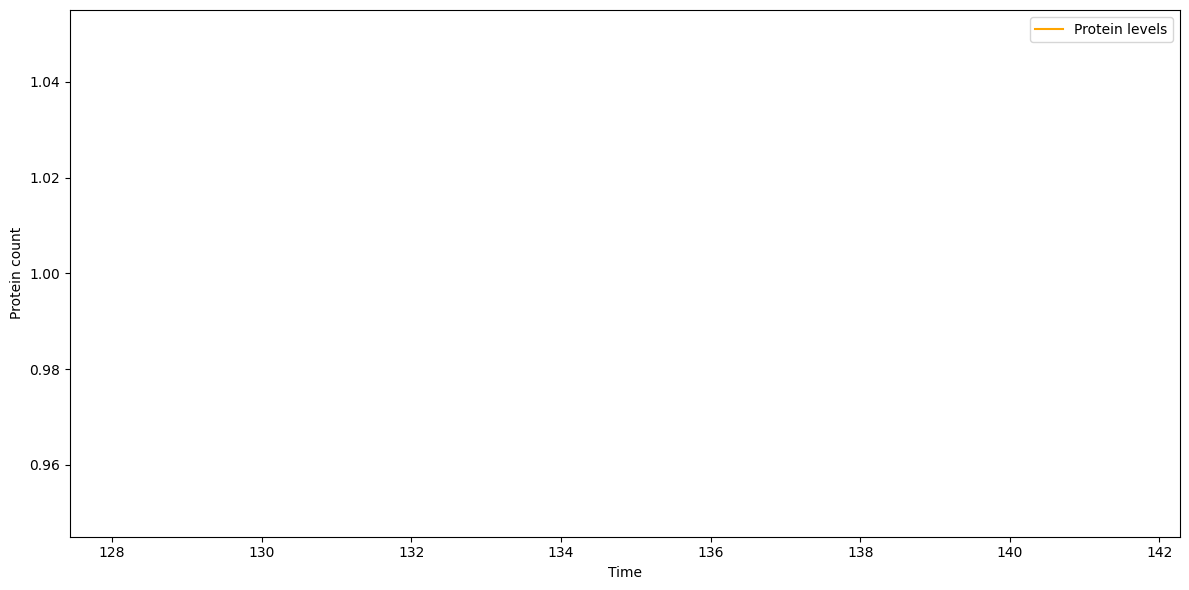

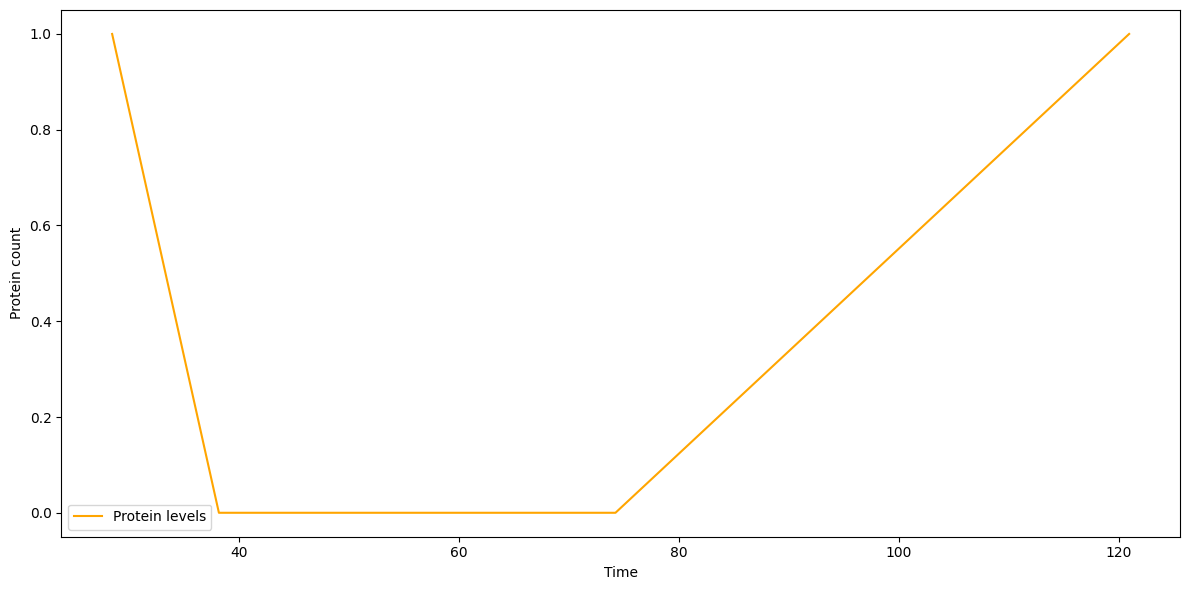

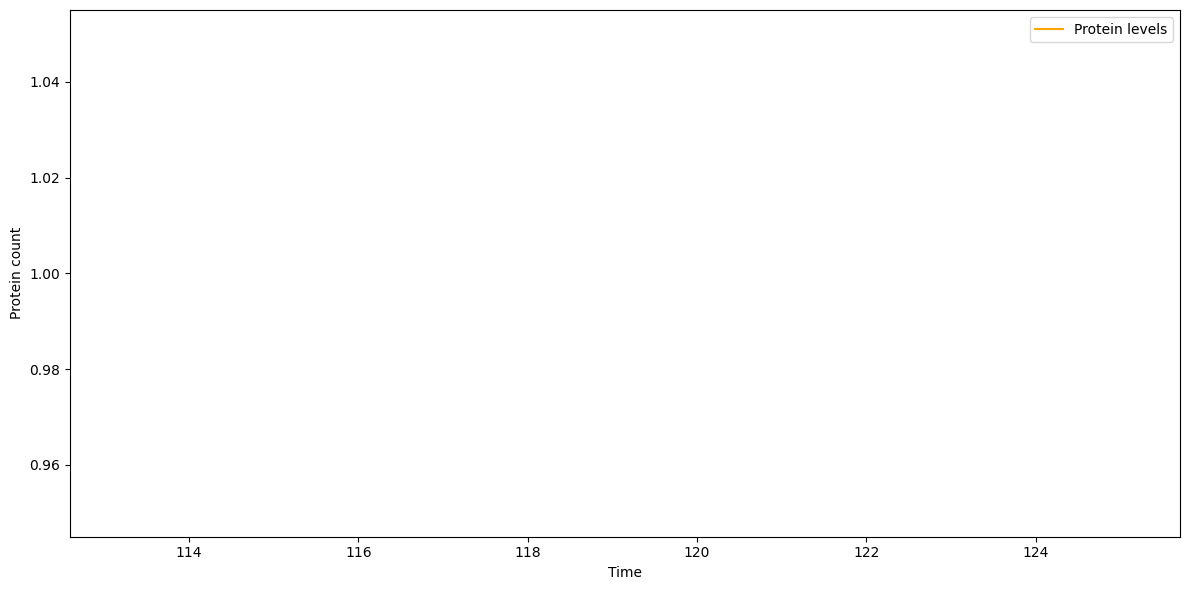

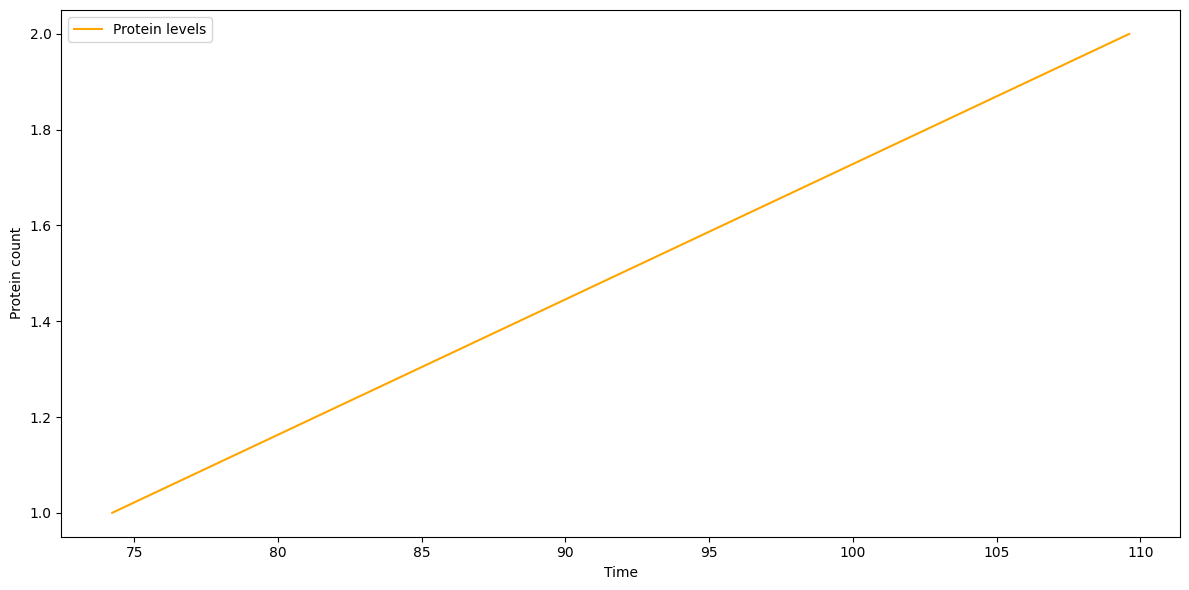

KeyboardInterrupt: 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rates for each reaction (constants)
alpha_on = 0.01     # Rate of G -> G*
alpha_off = 0.1     # Rate of G* -> G
gamma_p = 0.01      # Rate of M -> M + P (protein production)
protein_degradation = 0.01  # Rate of P -> 0 (protein degradation)

# Simulation time and number of cells
T = 100             # Simulation time
num_cells = 1000    # Number of cells to simulate

def gillespie_algorithm():
    # 1. Initialisation: Initial states - G is active, P = 0
    G_active = 1    # G is initially active
    P = 0           # Initial protein count
    t = 0           # Initialize time

    # Time until we stop the simulation
    t_max = T

    # Lists to store protein levels
    protein_levels = []
    times = []

    # Run the simulation until t exceeds t_max
    while t < t_max:
        # 2. Calculate reaction propensities (reaction rates)
        a1 = alpha_on * G_active         # Propensity for G -> G*
        a2 = alpha_off * (1 - G_active)  # Propensity for G* -> G
        a3 = gamma_p * G_active          # Propensity for G -> G + P (protein production)
        a4 = protein_degradation * P     # Propensity for P -> 0 (protein degradation)

        # Total propensity
        a0 = a1 + a2 + a3 + a4

        # If no reactions can happen, stop
        if a0 == 0:
            break

        # 3. Sample which reaction happens
        r = np.random.uniform(0, a0)
        if r < a1:
            G_active = 0  # G -> G*
        elif r < a1 + a2:
            G_active = 1  # G* -> G
        elif r < a1 + a2 + a3:
            P += 1        # G -> G + P (protein production)
        else:
            P = max(0, P - 1)  # P -> 0 (protein degradation)

        # 4. Sample time until next reaction
        tau = np.random.exponential(1 / a0)

        # 5.1 Update the time
        t += tau

        # 5.2 Store the current protein levels
        protein_levels.append(P)
        times.append(t)

    # Return time series data
    return times, protein_levels

def check_steady_state(time_series, window_size=50, tolerance=0.01):
    """
    Checks if the time series has reached steady-state.
    - time_series: Array of molecule counts (e.g., protein).
    - window_size: Number of time points for calculating the moving average.
    - tolerance: Tolerance for steady-state fluctuation.
    Returns True if steady-state is reached, False otherwise.
    """
    moving_avg = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')
    return np.all(np.abs(np.diff(moving_avg)) < tolerance)

# Arrays to store final protein levels for all cells after steady-state is reached
protein_final_levels = []

# Simulate the process for num_cells cells and check for steady-state
for _ in range(num_cells):
    times, protein_levels = gillespie_algorithm()
    
    # Check for steady state using moving average on the time series
    if check_steady_state(protein_levels):
        steady_state_protein = protein_levels[-int(0.2 * len(protein_levels)):]
        
        protein_final_levels.extend(steady_state_protein)

        # Plot EACH protein level over time
        plt.figure(figsize=(12, 6))

        # Plot protein levels
        plt.plot(times, protein_levels, label='Protein levels', color='orange')
        plt.xlabel('Time')
        plt.ylabel('Protein count')
        plt.legend()

        plt.tight_layout()
        plt.show()
    
    # else:
    #     print("Steady state not reached for this cell.")


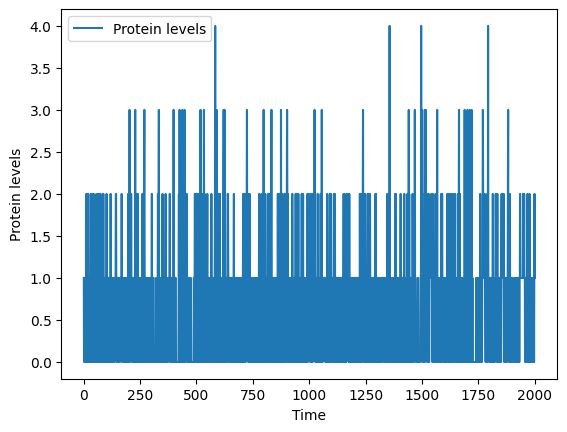

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rates for each reaction (constants)
lambda_on = 0.01     # Rate of G -> G*
gamma_off = 0.1     # Rate of G* -> G
p_ = 0.01      # Rate of G* -> G* + P (protein production)
d = 0.01  # Rate of P -> 0 (protein degradation)

# Simulation time and number of cells
T = 100             # Simulation time
num_cells = 1000    # Number of cells to simulate

def telegraph_model():
    # 1. Initialisation: Initial states - G is active, P = 0
    G_active = 1    # G is initially active
    P = 0           # Initial protein count
    t = 0           # Initialize time

    # Time until we stop the simulation
    t_max = T

    # Lists to store protein levels
    protein_levels = []
    times = []

    # Run the simulation until t exceeds t_max
    while t < t_max:
        # 2. Calculate reaction propensities (reaction rates)
        a1 = lambda_on * G_active         # Propensity for G -> G*
        a2 = gamma_off * (1 - G_active)  # Propensity for G* -> G
        a3 = p_ * G_active                 # Propensity for G* -> G* + P (protein production)
        a4 = d * P     # Propensity for P -> 0 (protein degradation)

        # Total propensity
        a0 = a1 + a2 + a3 + a4 

        # If no reactions can happen, stop
        if a0 == 0:
            break

        # 3. Sample which reaction happens
        r = np.random.uniform(0, a0)
        if r < a1:
            G_active = 0  # G -> G*
        elif r < a1 + a2:
            G_active = 1  # G* -> G
        elif r < a1 + a2 + a3:
            P += 1        # G* -> G* + P (protein production)
        else:
            P = max(0, P - 1)  # P -> 0 (protein degradation)

        # 4. Sample time until next reaction
        tau = np.random.exponential(1 / a0)

        # 5.1 Update the time
        t += tau

        # 5.2 Store the current protein levels
        protein_levels.append(P)
        times.append(t)

    # Return time series data
    return times, protein_levels

def check_steady_state(time_series, window_size=50, tolerance=0.01):
    """
    Checks if the time series has reached steady-state.
    - time_series: Array of molecule counts (e.g., mRNA or protein).
    - window_size: Number of time points for calculating the moving average.
    - tolerance: Tolerance for steady-state fluctuation.
    Returns True if steady-state is reached, False otherwise.
    """
    moving_avg = np.convolve(time_series, np.ones(window_size)/window_size, mode='valid')
    return np.all(np.abs(np.diff(moving_avg)) < tolerance)

# Arrays to store final protein levels for all cells after steady-state is reached
protein_final_levels = []

# Simulate the process for num_cells cells and check for steady-state
for _ in range(num_cells):
    times, protein_levels = telegraph_model()
    
    # Check for steady state using moving average on the time series
    if check_steady_state(protein_levels):
        steady_state_protein = protein_levels[-int(0.2 * len(protein_levels)):]
        
        protein_final_levels.extend(steady_state_protein)


    # else:
    #     print("Steady state not reached for this cell.")

# plot the results
plt.figure()
plt.plot(protein_final_levels, label='Protein levels')
plt.xlabel('Time')
plt.ylabel('Protein levels') 
plt.legend()
plt.show()

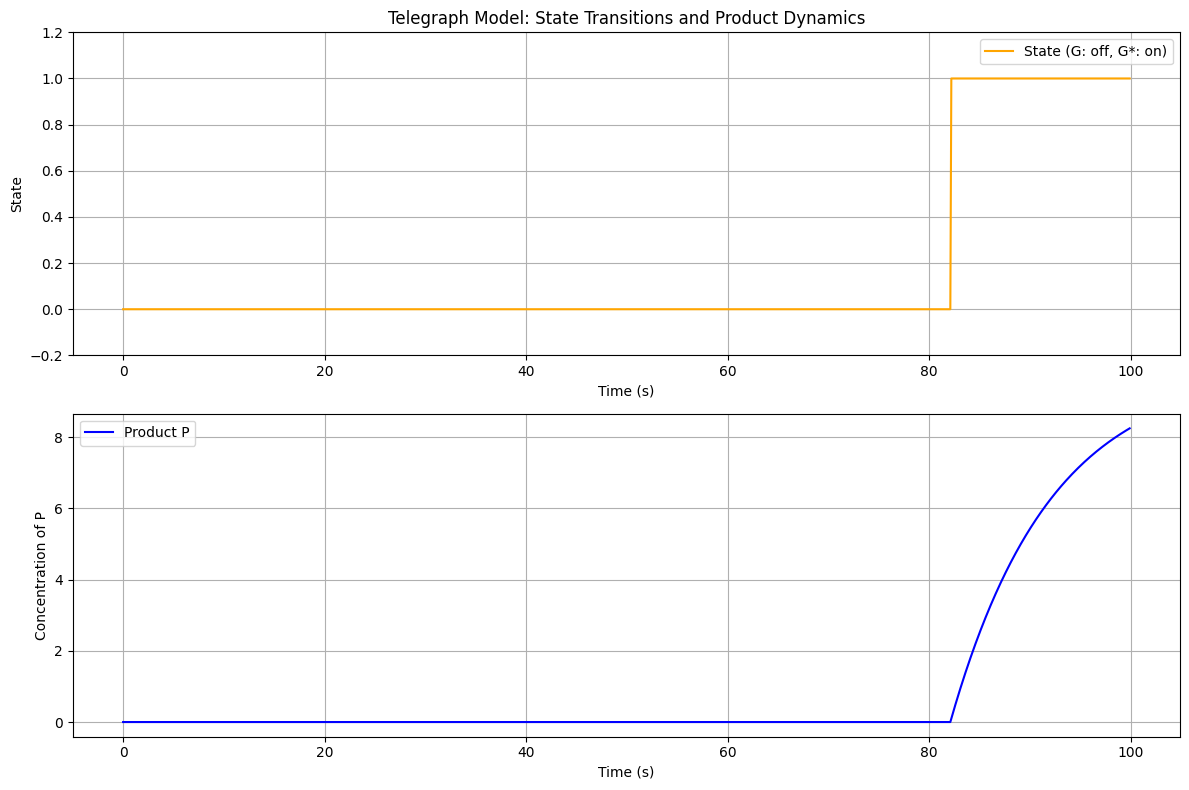

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_steps = 1000       # Number of time steps
dt = 0.1                # Time increment (s)
lambda_ = 0.05          # Rate of switching from G (off) to G* (on)
gamma = 0.05            # Rate of switching from G* (on) to G (off)
rho = 1.0               # Production rate of P in G* (on) state
d = 0.1                 # Degradation rate of P
random_seed = 42        # For reproducibility

# Initialize
np.random.seed(random_seed)
time = np.arange(0, time_steps * dt, dt)
state = np.zeros_like(time)  # 0: G (off), 1: G* (on)
P = np.zeros_like(time)      # Product concentration

# Simulate the telegraph model
for t in range(1, len(time)):
    # State transitions
    if state[t-1] == 0:  # G (off) state
        if np.random.rand() < lambda_ * dt:
            state[t] = 1  # Switch to G* (on)
        else:
            state[t] = 0  # Remain in G (off)
    elif state[t-1] == 1:  # G* (on) state
        if np.random.rand() < gamma * dt:
            state[t] = 0  # Switch to G (off)
        else:
            state[t] = 1  # Remain in G* (on)

    # Product dynamics
    if state[t] == 1:  # G* (on)
        P[t] = P[t-1] + rho * dt  # Production of P
    else:
        P[t] = P[t-1]  # No production

    # Degradation of P
    P[t] -= d * P[t] * dt
    P[t] = max(P[t], 0)  # Ensure non-negative concentrations

# Plot the results
plt.figure(figsize=(12, 8))

# Plot state transitions
plt.subplot(2, 1, 1)
plt.plot(time, state, color="orange", label="State (G: off, G*: on)")
plt.title("Telegraph Model: State Transitions and Product Dynamics")
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid()

# Plot product concentration
plt.subplot(2, 1, 2)
plt.plot(time, P, color="blue", label="Product P")
plt.xlabel("Time (s)")
plt.ylabel("Concentration of P")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
